# Welcome to the AIMS Jupyter Notebook - MHC Germline Analysis Version!
Use this notebook to recreate the analysis of Boughter & Meier-Schellersheim 2022. Note, if any of the plots you are trying to recreate utilize the TCR3D database (Figure1, Figure4), then you will need to use the PRESTO repository, https://github.com/ctboughter/PRESTO
# As a refresher, hit ctrl + enter to run each cell
I tried to add comments and other markdown cells like this one where appropriate to help with interpretations. This first cell is just loading in all of the necessary python modules (which you should have already installed)

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as pl
from matplotlib import rcParams
from matplotlib import rc
import pandas

# THIS LAST BIT IS TO NAVIAGATE TO WHERE MY CUSTOM MODULES ARE LOCATED
import os
if os.getcwd()[-4:] != 'AIMS':
    default_path = os.getcwd()[:-10]
    os.chdir(default_path)
import aims_loader as aimsLoad
import aims_analysis as aims
import aims_classification as classy
from Bio import SeqIO
import seaborn as sns

# Run this cell to get better looking plots

In [2]:
# You can edit these at some point if you want to change the formatting of your figures
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 20}
COLOR = 'black'
rcParams['text.color'] = 'black'
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

rc('font', **font)

# Custom colormap code from: https://stackoverflow.com/questions/49367144/modify-matplotlib-colormap
import matplotlib as mpl
upper = mpl.cm.jet(np.arange(256))
lower = np.ones((int(256/4),4))
for i in range(3):
    lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])

cmap = np.vstack(( lower, upper ))
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

# This is a Notebook Aimed at Reproducing the Analysis in Boughter & Meier-Schellersheim 2022
Currently a preprint (https://www.biorxiv.org/content/10.1101/2022.12.07.519507v2) hopefully published soon after a full year in review. Take a peek there to follow along and match analysis to interpretation

# Start off with typical AIMS definition of parameters and filenames

# Load in MHC Files

In [3]:
receptor1_label = ['HLA-A','HLA-B','HLA-C']
seqFrameF = aimsLoad.get_HLA()
seq1 = seqFrameF[seqFrameF[0].str.contains('A')]; seq1_cols, seq1_0 = aims.labelIT(len(seq1),receptor1_label[0])
seq2 = seqFrameF[seqFrameF[0].str.contains('B')]; seq2_cols, seq2_0 = aims.labelIT(len(seq2),receptor1_label[1])
seq3 = seqFrameF[seqFrameF[0].str.contains('C')]; seq3_cols, seq3_0 = aims.labelIT(len(seq3),receptor1_label[2])

classI = pandas.concat([seq1,seq2,seq3])

# Loading in ClassII is a tiny bit cleaner (because I did it second)
# It is a bit slow, however, since there is so many alignment steps
classIIa_df,classIIb_df = aimsLoad.get_classII()

# Generate AIMS encoding and visualize matrix for class I

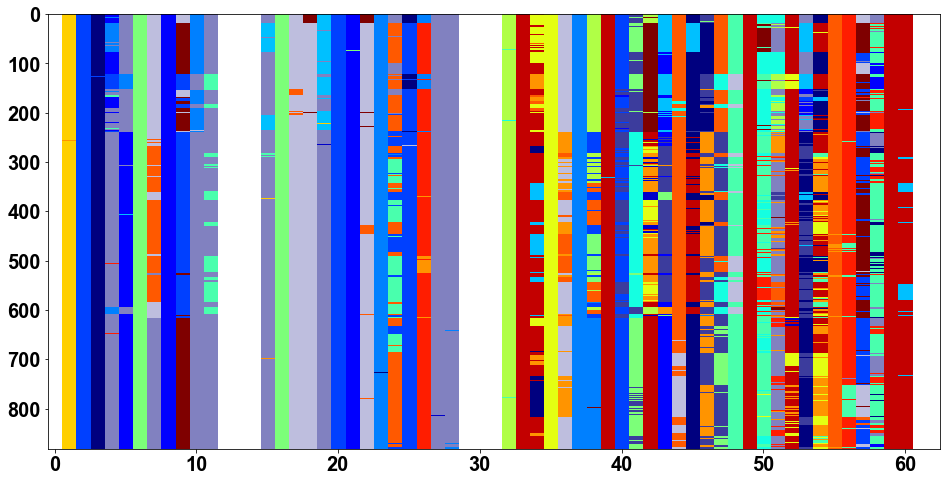

In [4]:
# Get these aligned sequences into an MSA matrix!!!
AA_num_key = aims.get_props()[1]
AA_num_key_dash = np.hstack((AA_num_key,[0]))
align = 'center'

# Gotta process these sequences:
plot_seq_classI = aims.get_mhcSub('classI',classI[1].values)

#plot_seq = np.transpose(np.array(seq_choice).reshape(len(seq_choice),1))
mat_sizeI = aims.get_sequence_dimension(np.transpose(plot_seq_classI))[0]
seq_MIclassI = aims.gen_MSA_matrix(np.transpose(plot_seq_classI) ,key = AA_num_key_dash, giveSize = mat_sizeI)

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
xyz = pl.imshow(seq_MIclassI, interpolation='nearest', aspect='auto',cmap=cmap)
#pl.savefig('classI_Mat.pdf',format='pdf')

# Generate AIMS encoding and visualize matrix for class II
Note, we DONT pick out the peptide contacting region for class II, as this wasn't a region of interest after the initial comparison for class I

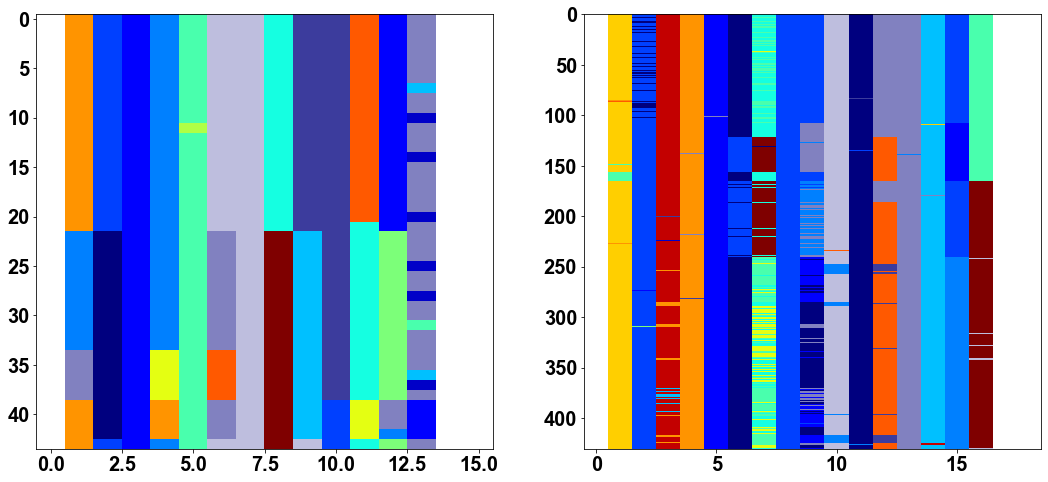

In [5]:
plot_seq_classIIa = aims.get_mhcSub('classIIa',classIIa_df[0].values)
plot_seq_classIIb = aims.get_mhcSub('classIIb',classIIb_df[0].values)

mat_sizeIIa = aims.get_sequence_dimension(np.transpose(plot_seq_classIIa))[0]
seq_MIclassIIa = aims.gen_MSA_matrix(np.transpose(plot_seq_classIIa) ,key = AA_num_key_dash, giveSize = mat_sizeIIa)
mat_sizeIIb = aims.get_sequence_dimension(np.transpose(plot_seq_classIIb))[0]
seq_MIclassIIb = aims.gen_MSA_matrix(np.transpose(plot_seq_classIIb) ,key = AA_num_key_dash, giveSize = mat_sizeIIb)

fig, ax = pl.subplots(1, 2,squeeze=False,figsize=(18,8))
xyz = ax[0,0].imshow(seq_MIclassIIa, interpolation='nearest', aspect='auto',cmap=cmap)
xyz = ax[0,1].imshow(seq_MIclassIIb, interpolation='nearest', aspect='auto',cmap=cmap)
#pl.savefig('classII_Mat.pdf',format='pdf')

# Next, Load in TCRs and Plot the Matrix Representation

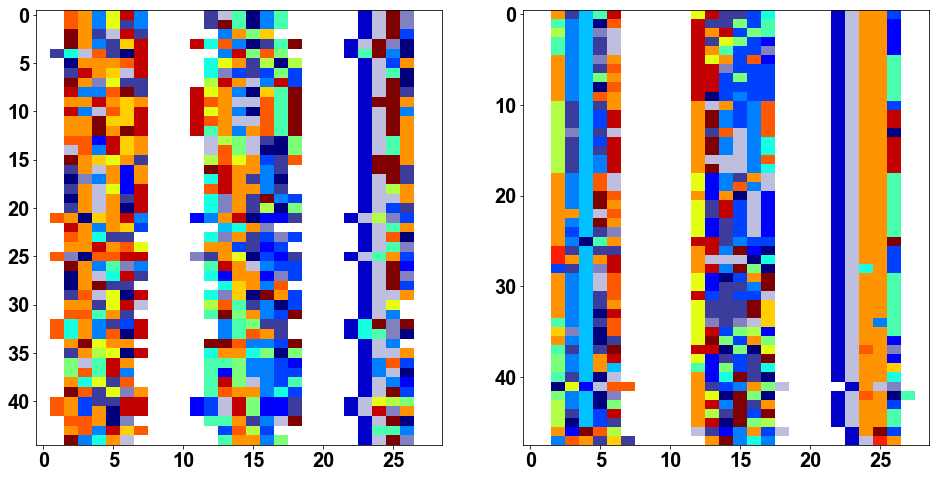

In [6]:
# Again, sequences are from IMGT Protein Displays, Just with CDR Loops Selected Out
# For now, only human analysis. Multi-organism is later on in this notebook
fin_trav, trav_name_pre = aimsLoad.Ig_loader('germline_data/trav_human_cdrs.csv','tcr',loops=3,return_index = True)
fin_trbv, trbv_name_pre = aimsLoad.Ig_loader('germline_data/trbv_human_cdrs.csv','tcr',loops=3,return_index = True)

# Plot just the TCRs
mat_size_tcr = aims.get_sequence_dimension(np.array(fin_trav))[0]
seq_MI_trav = aims.gen_MSA_matrix(np.array(fin_trav) ,key = AA_num_key_dash, giveSize = mat_size_tcr)

seq_MI_trbv = aims.gen_MSA_matrix(np.array(fin_trbv) ,key = AA_num_key_dash, giveSize = mat_size_tcr)

fig, ax = pl.subplots(1, 2,squeeze=False,figsize=(16,8))
xyz = ax[0,0].imshow(seq_MI_trav, interpolation='nearest', aspect='auto',cmap=cmap)
xyz = ax[0,1].imshow(seq_MI_trbv, interpolation='nearest', aspect='auto',cmap=cmap)
#pl.savefig('tcr_mat.pdf',format='pdf')

# Next, Reframe TCR-MHC Sequences as an Input-Output Problem
This makes the sequences compatible for the calculation of information-theoretic quantities

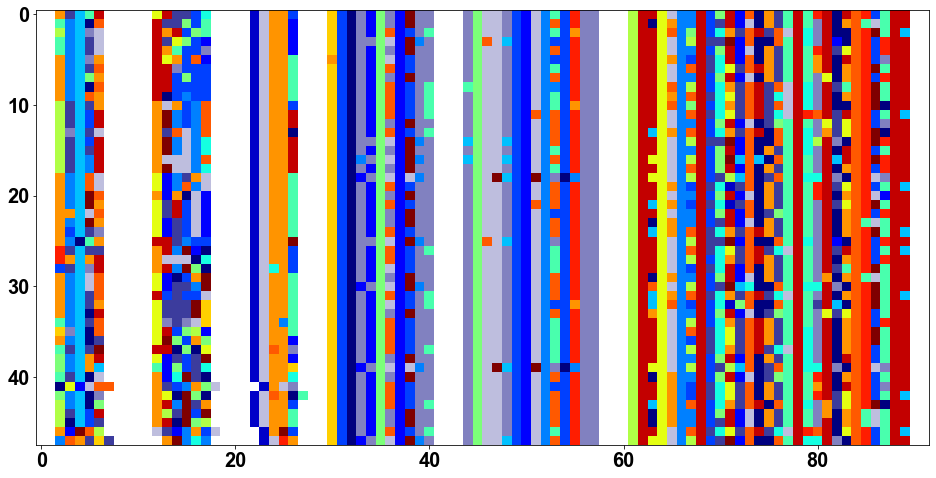

In [7]:
# pre-process the matrices
trav_mat_df = pandas.DataFrame(seq_MI_trav,index=fin_trav.columns)
trbv_mat_df = pandas.DataFrame(seq_MI_trbv,index=fin_trbv.columns)
MIclassI_mat_df = pandas.DataFrame(seq_MIclassI,index = classI[0])
MIclassIIa_mat_df = pandas.DataFrame(seq_MIclassIIa,index = classIIa_df['Allele'])
MIclassIIb_mat_df = pandas.DataFrame(seq_MIclassIIb,index = classIIb_df['Allele'])

# Visualize the resamples data to confirm we are properly pairing TCR CDR loops with
# single MHC sequences (specifically the key structural features)
matF = aims.randomize_tcr_mhc_pair(trbv_mat_df,MIclassI_mat_df)
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
xyz = ax[0,0].imshow(matF, interpolation='nearest', aspect='auto',cmap=cmap)
#pl.savefig('classIIb_paired_Mat.pdf',format='pdf')

# Here is where we give the user some options for how to run these calculations
Basically, you can choose to do the very slow (but rigorous) bootstrapping of these calculations to exactly recreate the manuscript analysis or you can calculate the entropy for the non-resampled dataset and an example resampling to calculate mutual information

In [8]:
########## Again, we have a key definition here ###############
bootstrap = False
##############################################################

if bootstrap:
    import multiprocessing as mp
    # Define the number of replications (resamples) we want to run
    num_reps = 1000
    
    def boot_it(data):
        
        # If we want to exactly recapitulate the Figure 1A/B, we need
        # to pick out certain subsets of the data
        #DP, DQ, DR ... Note, DRA may throw an error since there's only 1.
        #sub_df = classIIa_df[classIIa_df['Allele'].str.contains('DP')]
        #plot_sub = aims.get_mhcSub('classIIa',sub_df[0].values)
        #mat_size_sub = aims.get_sequence_dimension(np.transpose(plot_sub))[0]
        #seq_MI_sub = aims.gen_MSA_matrix(np.transpose(plot_sub) ,key = AA_num_key_dash, giveSize = mat_size_sub)
        #sub_mat_df = pandas.DataFrame(seq_MI_sub,index = sub_df['Allele'])
        
        ######### Need to swap this out for every possible pair #######
        matF = aims.randomize_tcr_mhc_pair(trbv_mat_df,MIclassIIb_mat_df)
        ##############################################################
        entropy,AA_count=aims.calculate_shannon(matF)
        MI,entropy_cond,counted=aims.calculate_MI(matF)
        return(entropy,MI,matF)
    # Command for mapping the bootstrap
    def do_boot(data):
        with mp.Pool() as pool:
            results = pool.map(boot_it, data)
            return(results)
    # Actually run the bootstrapping
    if __name__ == "__main__":
        resample_output = do_boot(np.arange(num_reps))

    # Concatenate everything
    for i in np.arange(num_reps):
        if i == 0:
            final_ent = resample_output[i][0]
            final_MI = resample_output[i][1]
        else:
            final_ent = np.vstack((final_ent,resample_output[i][0]))
            final_MI = np.dstack((final_MI,resample_output[i][1]))
    # Save the results so you don't need to run this super long calculation
    #np.save('classIIb_trbv_bootEnt',final_ent)
    #np.save('classIIb_trbv_bootMI',final_MI)
    
else:
    # Calculate the entropy for each individual dataset
    entropy_classIIa,AA_classIIa=aims.calculate_shannon(seq_MIclassIIa)
    entropy_classIIb,AA_classIIb=aims.calculate_shannon(seq_MIclassIIb)
    entropy_classI,AA_classI=aims.calculate_shannon(seq_MIclassI)
    entropy_trav,AA_trav = aims.calculate_shannon(seq_MI_trav)
    entropy_trbv,AA_trbv = aims.calculate_shannon(seq_MI_trbv)
    
    # And then calculate two resampled MI just to plot the figures
    resamp_travI = aims.randomize_tcr_mhc_pair(trav_mat_df,MIclassI_mat_df)
    MI_travI,ent_cond_travI,counted_travI=aims.calculate_MI(resamp_travI)
    resamp_trbvI = aims.randomize_tcr_mhc_pair(trbv_mat_df,MIclassI_mat_df)
    MI_trbvI,ent_cond_trbvI,counted_trbvI=aims.calculate_MI(resamp_trbvI)

# First, Process Either the Bootstrapped or Non-Bootstrapped Results, Then Plot

In [9]:
# Different processing for bootstrapped or not
# Can redefine bootstrap as "true" here if you want to load in pre-calculated data
#bootstrap = True
if bootstrap:
    # I'll only include two examples here, but use this code (with names changed) 
    # to process bootstrapped data broadly. Can also just go off of the "final_ent" above
    cI_trav_ent = np.load('classI_trav_bootEnt.npy')
    cI_trbv_ent = np.load('classI_trbv_bootEnt.npy')
    trav_I_entavg = np.average(cI_trav_ent,axis=0); trav_I_std = np.std(cI_trav_ent,axis=0)
    trbv_I_entavg = np.average(cI_trbv_ent,axis=0); trbv_I_std = np.std(cI_trbv_ent,axis=0)
else:
    # Can change this to trivially concatenate any two entropies
    cI_trav_ent = np.hstack((entropy_trav,entropy_classI))
    cI_trbv_ent = np.hstack((entropy_trbv,entropy_classI))

Text(0, 0.5, 'Entropy (Bits)')

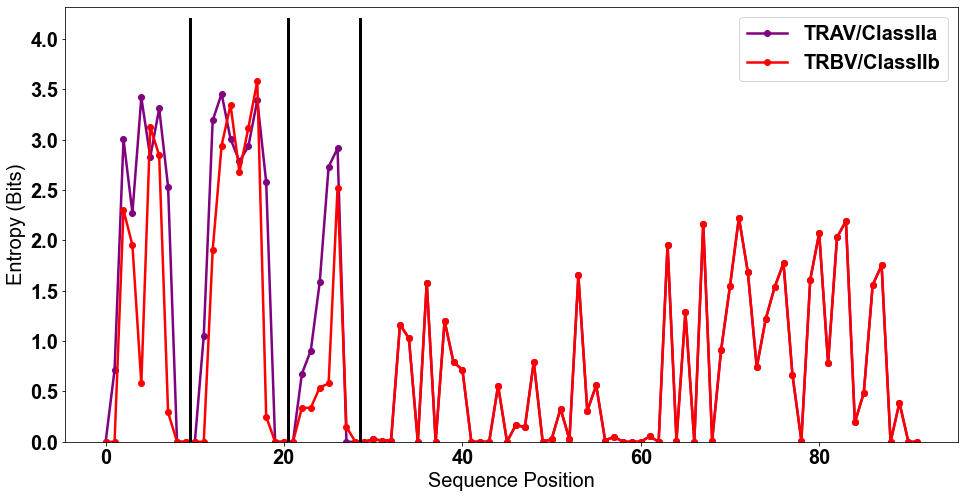

In [10]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
####### redefine these for whatever your variables are ######
if bootstrap:
    plot_avg1 = trav_I_entavg; plot_avg2 = trbv_I_entavg
    plot_std1 = trav_I_std; plot_std2 = trbv_I_std
else:
    plot_avg1 = cI_trav_ent; plot_avg2 = cI_trbv_ent
    # standard deviation is undefined for non-bootstrap data
    plot_std1 = []; plot_std2 = []
# Change this to whichever your input data is
full_mat_size = np.vstack((mat_size_tcr,mat_sizeIIa))
############################################################
if bootstrap:
    # This lets you plot the bootstrap average AND stdev
    pl.plot(plot_avg1,marker='o',linewidth=2.5,color='green')
    pl.fill_between(np.arange(len(plot_avg1)),plot_avg1+plot_std1,plot_avg1-plot_std1,color='green',alpha=0.3)
    pl.plot(plot_avg2,marker='o',linewidth=2.5,color='brown')
    pl.fill_between(np.arange(len(plot_avg2)),plot_avg2+plot_std2,plot_avg2-plot_std2,color='brown',alpha=0.3)
else:
    pl.plot(np.arange(len(plot_avg1)),plot_avg1,marker='o',color='purple',linewidth=2.5)
    pl.plot(np.arange(len(plot_avg2)),plot_avg2,marker='o',color='red',linewidth=2.5)
    
# Draw some lines to guide the reader
if type(full_mat_size) != int:
    for i in np.arange(len(full_mat_size)-1):
        ax[0,0].plot((full_mat_size[i] + sum(full_mat_size[:i]) - 0.5) * np.ones(100),np.linspace(0,4.2,100),'black',linewidth = 3)
    
pl.legend(['TRAV/ClassIIa','TRBV/ClassIIb'])
pl.ylim([0,4.32])
pl.xlabel('Sequence Position')
pl.ylabel('Entropy (Bits)')
#pl.savefig('mhc_classII_entropy.pdf',format='pdf')

# Now Do the Same Thing for the Mutual Information

In [11]:
# Different processing for bootstrapped or not
# Can redefine bootstrap as "true" here if you want to load in pre-calculated data
#bootstrap = True
if bootstrap:
    # I'll only include two examples here, but use this code (with names changed) 
    # to process bootstrapped data broadly. Can also just go off of the "final_ent" above
    trav_classI_MI = np.load('classI_trav_bootMI.npy')
    trbv_classI_MI = np.load('classI_trbv_bootMI.npy')
    trav_I_MIavg = np.average(trav_classI_MI,axis=2)
    trbv_I_MIavg = np.average(trbv_classI_MI,axis=2)
else:
    trav_classI_MI = MI_travI
    trbv_classI_MI = MI_trbvI


# First, Just Show the Raw MI for one Example

Text(0.5, 1.0, 'TRAV:MHC MI')

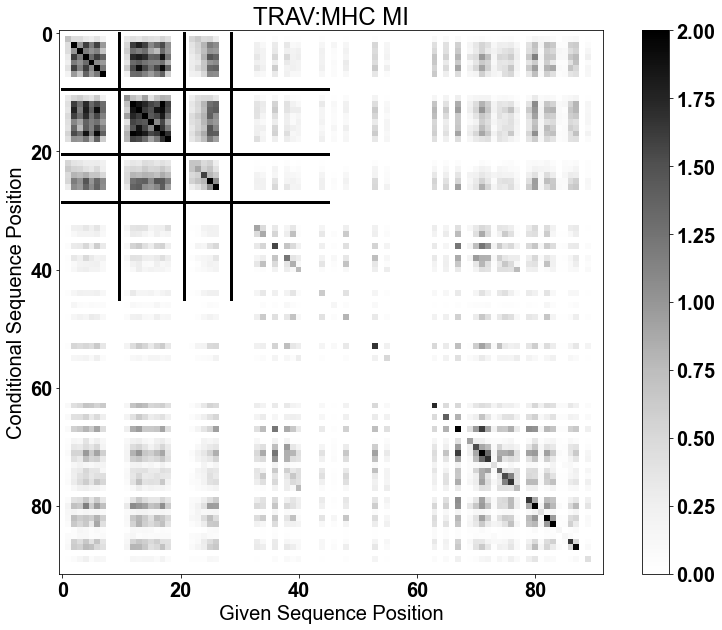

In [12]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(14,10))

x = ax[0,0].imshow(trav_classI_MI,vmin=0,vmax=2,cmap=cm.Greys)
# Again, make something to guide the eyes
poses = sum(full_mat_size)[0]
for i in np.arange(len(full_mat_size)-1):
    ax[0,0].plot( (full_mat_size[i] + sum(full_mat_size[:i]) - 0.5) * np.ones(100),np.linspace(0,poses,100),'black',linewidth = 3)
    ax[0,0].plot( np.linspace(0,poses,100), (full_mat_size[i] + sum(full_mat_size[:i]) - 0.5) * np.ones(100) ,'black',linewidth = 3)
pl.colorbar(x)
pl.xlabel('Given Sequence Position')
pl.ylabel('Conditional Sequence Position')
pl.title('TRAV:MHC MI')
#pl.savefig('AIMS_classI_trav_MI.pdf',format='pdf')

# Then, Show the ∆MI Between TRAV and TRBV

Text(0.5, 1.0, 'TRAV:MHC MI - TRBV:MHC MI')

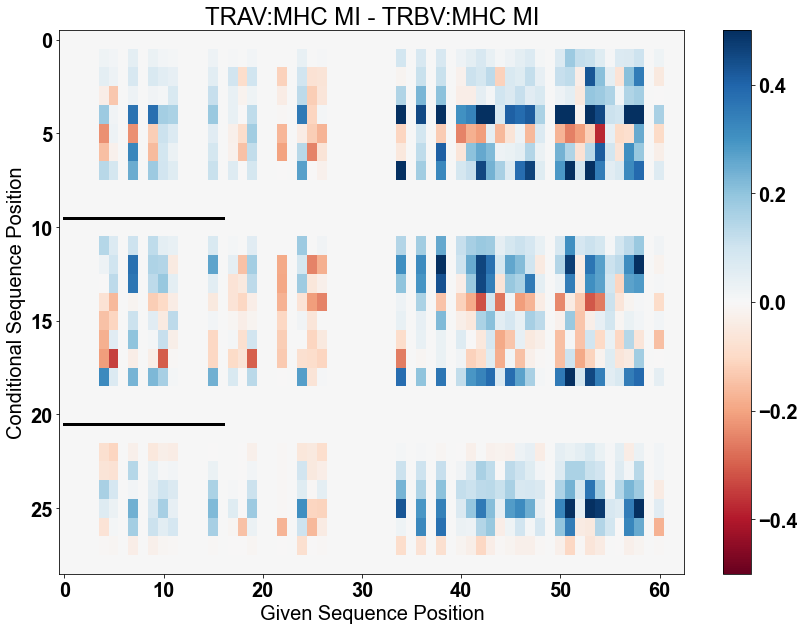

In [13]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(14,10))
# Select out only the cross-entropy with this subset
subset = int(mat_size_tcr[2] + sum(mat_size_tcr[:2]))
# plot it
x = ax[0,0].imshow((trav_classI_MI-trbv_classI_MI)[:subset,subset:],vmin=-0.5,vmax=0.5, interpolation='nearest', aspect='auto',cmap=cm.RdBu)

# Again, draw lines to guide the eyes, separate distinct structural features
poses = sum(full_mat_size[:3])[0]
mat_size_sub = full_mat_size[3:]
for i in np.arange(len(mat_size_sub)-1):
    ax[0,0].plot( (mat_size_sub[i] + sum(mat_size_sub[:i]) - 0.5) * np.ones(100),np.linspace(0,poses,100),'black',linewidth = 3)

# Need to redefine poses and mat_size_sub to only have TCR
poses = sum(full_mat_size[3:])[0]
mat_size_sub = full_mat_size[:3]
for i in np.arange(len(mat_size_sub)-1):
    ax[0,0].plot( np.linspace(0,poses,100), (mat_size_sub[i] + sum(mat_size_sub[:i]) - 0.5) * np.ones(100) ,'black',linewidth = 3)
    
pl.colorbar(x)
pl.xlabel('Given Sequence Position')
pl.ylabel('Conditional Sequence Position')
pl.title('TRAV:MHC MI - TRBV:MHC MI')
#pl.savefig('AIMS_classI_trav-trbv_MIzoom.pdf',format='pdf')

# Begin Calculation of Interaction Potentials
Note, the generation of these ineraction potentials is VERY slow. You can skip this section if you don't care to recreate interaction potential analysis

# VERY Inefficient, But in Our Calculation of Interaction Potential We Calculate EVERY Possible Interaction
So, you need to generate a new, "concatenated dataframe" of the combinatorics here

In [14]:
# Need to do some combinatorics fun to generate a complete dataset:
first = True
a = 0
tcr_dframe = pandas.concat([fin_trav,fin_trbv],axis=0)
tcr_dframe.index = ['CDR1A','CDR2A','CDR3A','CDR1B','CDR2B','CDR3B']

#mhc_df = classI # (or classIIa_df, or classIIb_df)
mhc_df = classIIa_df

for i in np.transpose(mhc_df[0]):
    if i == '':
        print(a)
        continue
    repeat_mhc = np.transpose(pandas.DataFrame([i]*np.shape(tcr_dframe)[1]))
    repeat_mhc.columns = tcr_dframe.columns
    if first:
        concat_dframe = pandas.concat([tcr_dframe,repeat_mhc],axis=0)
        first = False
    else:
        concat_dframe = pandas.concat([concat_dframe,pandas.concat([tcr_dframe,repeat_mhc],axis=0)],axis=1)
    a = a +1
seqF_cols, seqF_0 = aims.labelIT(np.shape(concat_dframe)[1],'mhc_tcr_pair')
concat_dframe.columns = seqF_cols

# NOTE: Really not recommended to run this next cell. Calculation takes VERY long
Talking 0.5-1 hour per loop, and you need to do all 4 loops. Only run this cell if you are very interested in the results.

Really need to make this code more efficient at some point... could likely speed this up a LOT but not calculating the interaction potential of the FULL MHC sequence, but for now that is what I do for consistency with the manuscript

Instead of running this code, you can now download the output data! Check out the Zenodo repository DOI:10.5281/zenodo.7023681 (link: https://doi.org/10.5281/zenodo.7023680 )

# I did re-run these for the v0 interaction potential for reviews. Please post an issue to the GitHub if you want these also uploaded to Zenodo

In [1070]:
# Run through these calculations for every loop (and then later for every MHC chain)
#CDR1A','CDR2A','CDR1B','
#for loop in ['CDR1A','CDR2A','CDR1B','CDR2B']:
    # Have to sort of double transpose these.
    # First one is to select the data subset, second one to input into software
    # Note, TRAV is shorter than TRBV so sometimes need to dropna columns
    #dChoice = np.transpose(concat_dframe)[[loop,0]].dropna()
    # Scormat can either be v1 or v2. v2 Used for the manuscript
    #scores, score_avg, score_std = aims.get_interaction_score(np.transpose(dChoice),MSA=False,scorMat='v0')
    # Save the results since this takes SO LONG
    #np.save(loop+'_classIIa_score',scores); np.save(loop+'_classIIa_average',score_avg); np.save(loop+'_classIIa_std',score_std)

# Hopefully you can now load back in the files and do the rest of the analysis
Note, obviously the path listed here assumes you download the data from Zenodo (link posted above) and put that new data into the main AIMS directory

In [13]:
mhc_class = 1

############## ONLY RUN THIS CODE if you have downloaded or created your own HLA Scoring Files ################
# And, obviously, fill in the path for "my_dir"
my_dir = '/home/bizon/Desktop/projects/0Top_projects/Immunopep/AIMS/saved_HLA_scoring/'
if len(my_dir) > 0:
    if mhc_class == 1:
        a1_scores = np.load(my_dir+'AIMS_interact_scores/cdr1a_classI_FullScores.npy')
        a2_scores = np.load(my_dir+'AIMS_interact_scores/cdr2a_classI_FullScores.npy')
        b1_scores = np.load(my_dir+'AIMS_interact_scores/cdr1b_classI_FullScores.npy')
        b2_scores = np.load(my_dir+'AIMS_interact_scores/cdr2b_classI_FullScores.npy')
    elif mhc_class == 2:
        a1_IIa_scores = np.load(my_dir+'AIMS_interact_scores/CDR1A_classIIa_score.npy')
        a1_IIb_scores = np.load(my_dir+'AIMS_interact_scores/CDR1A_classIIb_score.npy')
        a2_IIa_scores = np.load(my_dir+'AIMS_interact_scores/CDR2A_classIIa_score.npy')
        a2_IIb_scores = np.load(my_dir+'AIMS_interact_scores/CDR2A_classIIb_score.npy')
        b1_IIa_scores = np.load(my_dir+'AIMS_interact_scores/CDR1B_classIIa_score.npy')
        b1_IIb_scores = np.load(my_dir+'AIMS_interact_scores/CDR1B_classIIb_score.npy')
        b2_IIa_scores = np.load(my_dir+'AIMS_interact_scores/CDR2B_classIIa_score.npy')
        b2_IIb_scores = np.load(my_dir+'AIMS_interact_scores/CDR2B_classIIb_score.npy')

# A REMINDER OF WHAT THESE SCORING MATRICES ACTUALLY CONTAIN
They are the combinatorics of EVERY TCR interacting with EVERY MHC (in the first axis). Second axis is the position of the TCR residue. Third axis is the position of the MHC residue. These are in MSA space, so you may need to re-align in some cases (should be easy to find in most cases)

# So this is what we do for our by-allele breakdown of the interactions scores

# We Need to Pull Back in Our MHC Allele Names and Our TCR Allele Names

In [14]:
# HLA NAMES CLASS I
hla_names_I = pandas.read_csv('germline_data/HLAnames2.csv').values[0:]
# HLA NAMES CLASS IIa
hla_names_IIa = pandas.read_csv('germline_data/classIIa_names.csv').values[0:]
# HLA NAMES CLASS IIb
hla_names_IIb = pandas.read_csv('germline_data/classIIb_names.csv').values[0:]

# Now load in the individual TCR alleles
trav_name = trav_name_pre.values
trbv_name = trbv_name_pre.values

# Pretty much every step from here on out is pretty slow... As a heads up
The next cell takes ~5 minutes to run my personal laptop

Text(0.5, 1.0, 'CDR2A Interaction Breakdown')

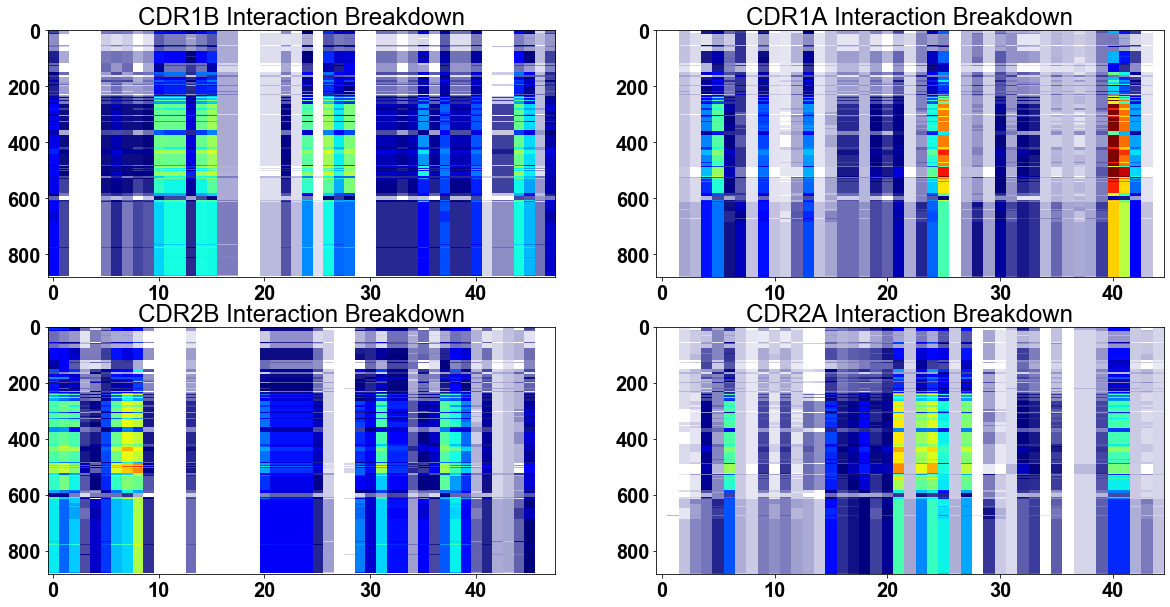

In [15]:
mhc_class = 1
if mhc_class == 1:
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
elif mhc_class == 2:
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_IIb_scores,trbv_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_IIb_scores,trbv_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True)

    
fig, ax = pl.subplots(2, 2,squeeze=False,figsize=(20,10))
x = ax[0,0].imshow(np.transpose(b1_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)
x = ax[1,0].imshow(np.transpose(b2_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)
x = ax[0,1].imshow(np.transpose(a1_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)
x = ax[1,1].imshow(np.transpose(a2_breakdown), interpolation='nearest', aspect='auto',cmap=cmap,vmin = 0,vmax = 5)

ax[0,0].set_title('CDR1B Interaction Breakdown'); ax[1,0].set_title('CDR2B Interaction Breakdown')
ax[0,1].set_title('CDR1A Interaction Breakdown'); ax[1,1].set_title('CDR2A Interaction Breakdown')

#pl.savefig('/Users/boughterct/Desktop/classIIb_v0heatMaps.pdf',format='pdf')

Text(0, 0.5, 'Average Interaction Potential')

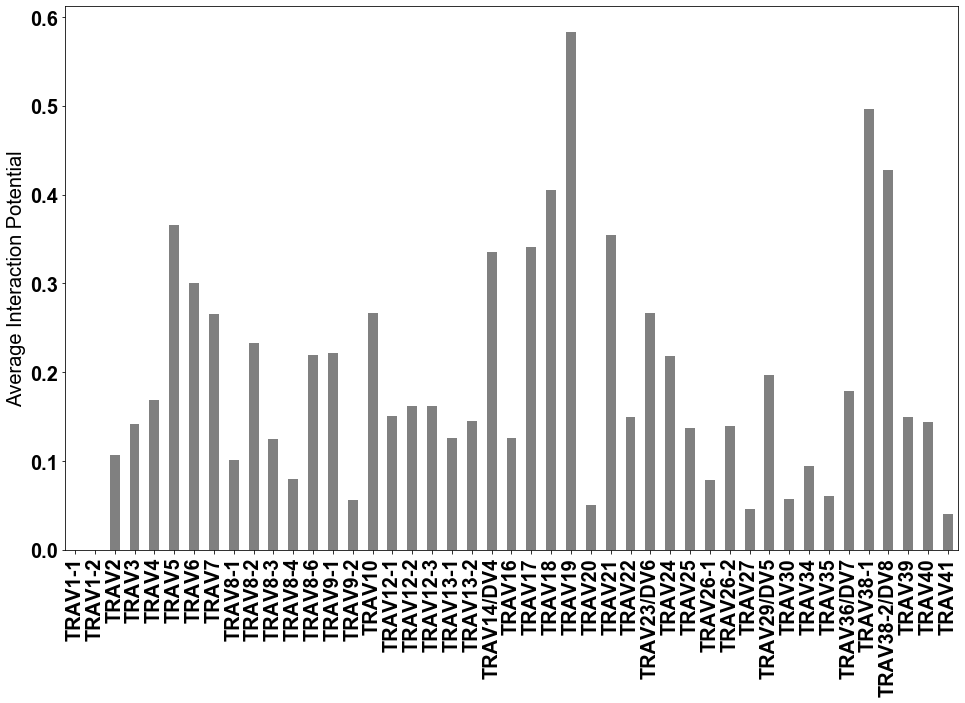

In [56]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,10))
trav_plot_df = np.transpose(pandas.concat([a1_breakdown,a2_breakdown],axis=1)).mean()
trav_plot_df.plot.bar(color='grey')
pl.ylabel('Average Interaction Potential')

Text(0, 0.5, 'Average Interaction Potential')

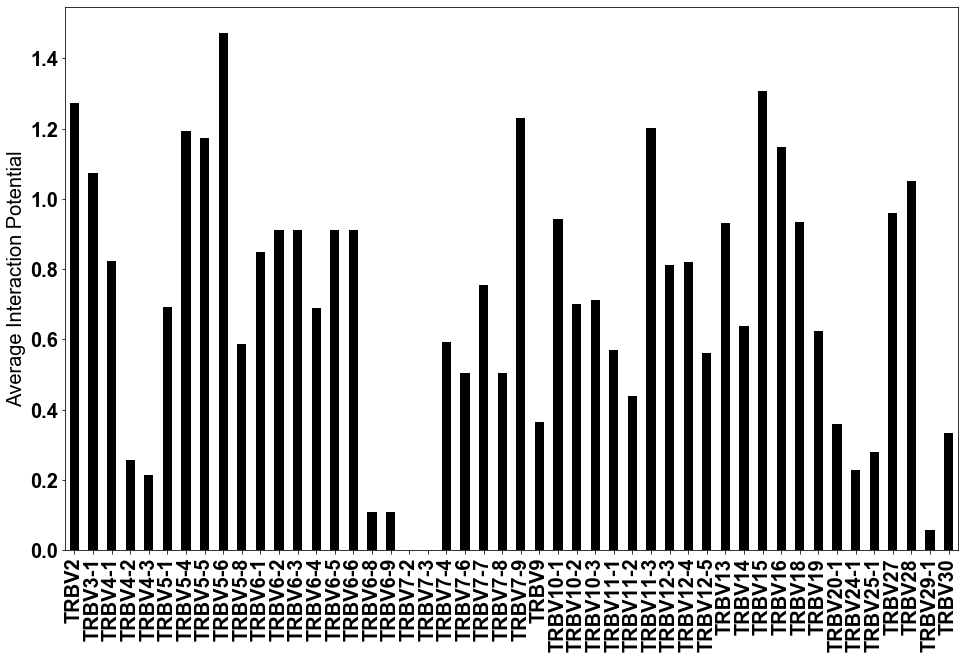

In [57]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,10))
trbv_plot_df = np.transpose(pandas.concat([b1_breakdown,b2_breakdown],axis=1)).mean()
trbv_plot_df.plot.bar(color='black')
pl.ylabel('Average Interaction Potential')

In [18]:
#### Define if you want to calculate the clash score or the standard score here #######
clash=False
if mhc_class == 1:
    #######################################################################
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    # now reversed
    b1_reverse,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    b2_reverse,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_scores,trbv_name,hla_names_I,mhc_type='classI',ScoreAlpha1=False,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a1_reverse,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    a2_reverse,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_scores,trav_name,hla_names_I,mhc_type='classI',ScoreAlpha1=True,ScoreAlpha2=False,len_weight=True,score_weight=True,clash=clash)
    
elif mhc_class == 2:
    # Note, can keep "Score" True for both chains because we only input one of the chains, other left blank
    #######################################################################
    b1_breakdown,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_IIa_scores,trbv_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    b2_breakdown,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_IIa_scores,trbv_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a1_breakdown,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a2_breakdown,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_IIb_scores,trav_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    # now reversed
    b1_reverse,b1_coords,b1_noMatch = aims.get_byAllele_scores(b1_IIb_scores,trbv_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    b2_reverse,b2_coords,b2_noMatch = aims.get_byAllele_scores(b2_IIb_scores,trbv_name,hla_names_IIb,mhc_type='classII_beta',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a1_reverse,a1_coords,a1_noMatch = aims.get_byAllele_scores(a1_IIa_scores,trav_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)
    a2_reverse,a2_coords,a2_noMatch = aims.get_byAllele_scores(a2_IIa_scores,trav_name,hla_names_IIa,mhc_type='classII_alpha',ScoreAlpha1=True,ScoreAlpha2=True,len_weight=True,score_weight=True,clash=clash)

In [19]:
# Class II strings in the comment next to the definition
if mhc_class == 1:
    sub_class_1 = 'A'
    sub_class_2 = 'B'
    sub_class_3 = 'C'
elif mhc_class == 2:
    sub_class_1 = 'DQ'
    sub_class_2 = 'DR'
    sub_class_3 = 'DP'

b1_a = np.average(np.transpose(b1_breakdown)[b1_breakdown.columns.str.contains(sub_class_1)].values);b1_b = np.average(np.transpose(b1_breakdown)[b1_breakdown.columns.str.contains(sub_class_2)].values);b1_c = np.average(np.transpose(b1_breakdown)[b1_breakdown.columns.str.contains(sub_class_3)].values)
b1_aR = np.average(np.transpose(b1_reverse)[b1_reverse.columns.str.contains(sub_class_1)].values);b1_bR = np.average(np.transpose(b1_reverse)[b1_reverse.columns.str.contains(sub_class_2)].values);b1_cR = np.average(np.transpose(b1_reverse)[b1_reverse.columns.str.contains(sub_class_3)].values);

b2_a = np.average(np.transpose(b2_breakdown)[b2_breakdown.columns.str.contains(sub_class_1)].values);b2_b = np.average(np.transpose(b2_breakdown)[b2_breakdown.columns.str.contains(sub_class_2)].values);b2_c = np.average(np.transpose(b2_breakdown)[b2_breakdown.columns.str.contains(sub_class_3)].values)
b2_aR = np.average(np.transpose(b2_reverse)[b2_reverse.columns.str.contains(sub_class_1)].values);b2_bR = np.average(np.transpose(b2_reverse)[b2_reverse.columns.str.contains(sub_class_2)].values);b2_cR = np.average(np.transpose(b2_reverse)[b2_reverse.columns.str.contains(sub_class_3)].values);

a1_a = np.average(np.transpose(a1_breakdown)[a1_breakdown.columns.str.contains(sub_class_1)].values);a1_b = np.average(np.transpose(a1_breakdown)[a1_breakdown.columns.str.contains(sub_class_2)].values);a1_c = np.average(np.transpose(a1_breakdown)[a1_breakdown.columns.str.contains(sub_class_3)].values)
a1_aR = np.average(np.transpose(a1_reverse)[a1_reverse.columns.str.contains(sub_class_1)].values);a1_bR = np.average(np.transpose(a1_reverse)[a1_reverse.columns.str.contains(sub_class_2)].values);a1_cR = np.average(np.transpose(a1_reverse)[a1_reverse.columns.str.contains(sub_class_3)].values);

a2_a = np.average(np.transpose(a2_breakdown)[a2_breakdown.columns.str.contains(sub_class_1)].values);a2_b = np.average(np.transpose(a2_breakdown)[a2_breakdown.columns.str.contains(sub_class_2)].values);a2_c = np.average(np.transpose(a2_breakdown)[a2_breakdown.columns.str.contains(sub_class_3)].values)
a2_aR = np.average(np.transpose(a2_reverse)[a2_reverse.columns.str.contains(sub_class_1)].values);a2_bR = np.average(np.transpose(a2_reverse)[a2_reverse.columns.str.contains(sub_class_2)].values);a2_cR = np.average(np.transpose(a2_reverse)[a2_reverse.columns.str.contains(sub_class_3)].values);

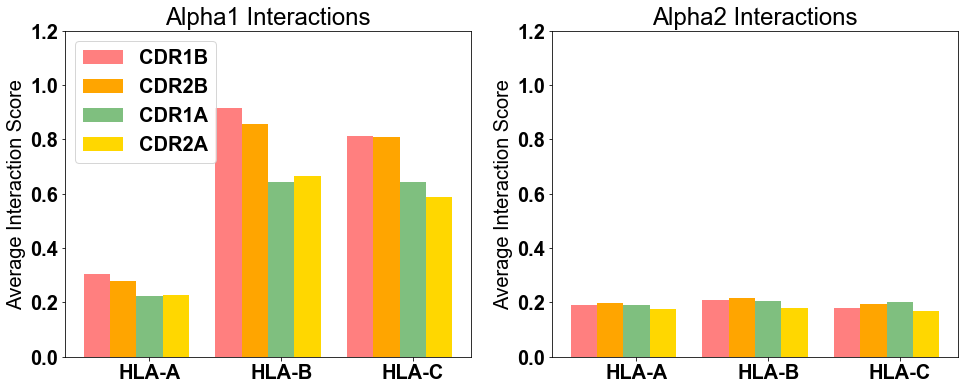

In [20]:
fig, ax = pl.subplots(1, 2,squeeze=False,figsize=(16,6))
# alpha1
ax[0,0].bar([-0.4,0.6,1.6],[b1_a,b1_b,b1_c],width=0.2,color='red',alpha=0.5); ax[0,0].bar([-0.2,0.8,1.8],[b2_a,b2_b,b2_c],width=0.2,color='orange')
ax[0,0].bar([0,1,2],[a1_aR,a1_bR,a1_cR],width=0.2,color='green',alpha=0.5); ax[0,0].bar([0.2,1.2,2.2],[a2_aR,a2_bR,a2_cR],width=0.2,color='gold')
xax=pl.setp(ax[0,0],xticks=np.arange(3),xticklabels=['HLA-A','HLA-B','HLA-C'])
#xax=pl.setp(ax[0,0],xticks=np.arange(3),xticklabels=['HLA-DQ','HLA-DR','HLA-DP'])
ax[0,0].set_title('Alpha1 Interactions')
ax[0,0].set_ylabel('Average Interaction Score')
# alpha2
ax[0,1].bar([-0.4,0.6,1.6],[b1_aR,b1_bR,b1_cR],width=0.2,color='red',alpha=0.5); ax[0,1].bar([-0.2,0.8,1.8],[b2_aR,b2_bR,b2_cR],width=0.2,color='orange')
ax[0,1].bar([0,1,2],[a1_a,a1_b,a1_c],width=0.2,color='green',alpha=0.5); ax[0,1].bar([0.2,1.2,2.2],[a2_a,a2_b,a2_c],width=0.2,color='gold')
xax=pl.setp(ax[0,1],xticks=np.arange(3),xticklabels=['HLA-A','HLA-B','HLA-C'])
#xax=pl.setp(ax[0,0],xticks=np.arange(3),xticklabels=['HLA-DQ','HLA-DR','HLA-DP'])
ax[0,1].set_title('Alpha2 Interactions')
ax[0,0].legend(['CDR1B','CDR2B','CDR1A','CDR2A'])
ax[0,1].set_ylabel('Average Interaction Score')

if clash:
    ax[0,0].set_ylim([-0.3,0])
    ax[0,1].set_ylim([-0.3,0])
else:
    ax[0,0].set_ylim([0,1.2])
    ax[0,1].set_ylim([0,1.2])

#pl.savefig('tcrBar_classI_HLAbreakdown_BADclash.pdf',format='pdf')

# So the first version of the manuscript, I have a Bar Graph, I think a Violin Plot is More Appropriate?

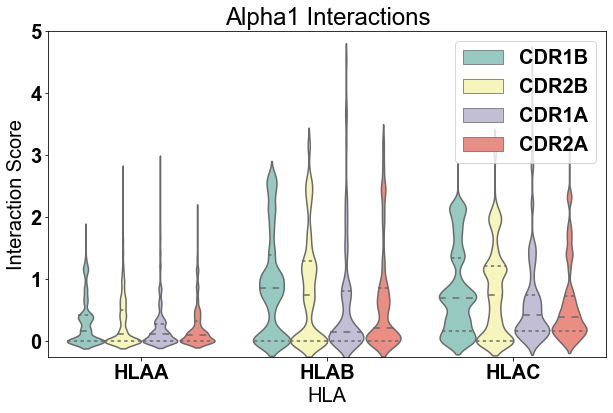

In [21]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(10,6))
names = ['CDR1B','CDR2B','CDR1A','CDR2A']
violin_df = []
for temp_class in [sub_class_1,sub_class_2,sub_class_3]:
    name_hold = 0
    for temp_var in [b1_breakdown,b2_breakdown,a1_reverse,a2_reverse]:
        temp_name = names[name_hold]
        temp_data = np.transpose(temp_var)[temp_var.columns.str.contains(temp_class)].values
        temp_shape = np.shape(temp_data)
        temp_reshape = pandas.DataFrame(temp_data.reshape(temp_shape[0]*temp_shape[1]))
        temp_name = pandas.DataFrame(len(temp_reshape)*[temp_name])
        temp_hla = pandas.DataFrame(len(temp_reshape)*['HLA'+temp_class])
        temp_df = pandas.concat([temp_reshape,temp_name,temp_hla],axis=1); temp_df.columns =['Interaction Score','Name','HLA']
        if len(violin_df) == 0:
            violin_df = temp_df
        else:
            violin_df = pandas.concat([violin_df,temp_df],axis=0)
        name_hold += 1
x=sns.violinplot(x='HLA',y='Interaction Score',data=violin_df,inner="quartile",palette='Set3',hue='Name',scale='count')
x.legend_.set_title(None)
pl.title('Alpha1 Interactions')

if clash:
    pl.ylim([-3,0.1])
else:
    pl.ylim([-0.25,5])
#sns.violinplot(x='HLA',y='Data',data=violin_df,palette='Set2',hue='Name')
#pl.savefig('alpha1_violin_classII_v0.pdf',format='pdf')

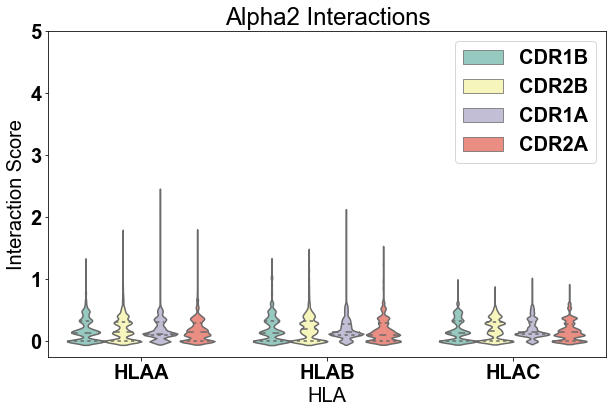

In [22]:
names = ['CDR1B','CDR2B','CDR1A','CDR2A']
violin_df = []
for temp_class in [sub_class_1,sub_class_2,sub_class_3]:
    name_hold = 0
    for temp_var in [b1_reverse,b2_reverse,a1_breakdown,a2_breakdown]:
        temp_name = names[name_hold]
        temp_data = np.transpose(temp_var)[temp_var.columns.str.contains(temp_class)].values
        temp_shape = np.shape(temp_data)
        temp_reshape = pandas.DataFrame(temp_data.reshape(temp_shape[0]*temp_shape[1]))
        temp_name = pandas.DataFrame(len(temp_reshape)*[temp_name])
        temp_hla = pandas.DataFrame(len(temp_reshape)*['HLA'+temp_class])
        temp_df = pandas.concat([temp_reshape,temp_name,temp_hla],axis=1); temp_df.columns =['Interaction Score','Name','HLA']
        if len(violin_df) == 0:
            violin_df = temp_df
        else:
            violin_df = pandas.concat([violin_df,temp_df],axis=0)
        name_hold += 1

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(10,6))
x=sns.violinplot(x='HLA',y='Interaction Score',data=violin_df,inner="quartile",palette='Set3',hue='Name',scale='count')
x.legend_.set_title(None)
pl.title('Alpha2 Interactions')

if clash:
    pl.ylim([-3,0.1])
else:
    pl.ylim([-0.25,5])
#sns.violinplot(x='HLA',y='Data',data=violin_df,palette='Set2',hue='Name')
#pl.savefig('alpha2_violin_classII_v0.pdf',format='pdf')

# This is what we do for our by-residue interaction score processing

# Even Processing these Scores Takes a Bit of Time
Probably 5 or so minutes

In [23]:
if mhc_class == 1:
    cdra1_classI = aims.get_byRes_scores(a1_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
    cdra2_classI = aims.get_byRes_scores(a2_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
    cdrb1_classI = aims.get_byRes_scores(b1_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
    cdrb2_classI = aims.get_byRes_scores(b2_scores,mhc_type ='classI', scoreWeight = True,lenWeight=True)
elif mhc_class == 2:
    # b1, need to concatenate these a little differently
    cdrb1_alpha = aims.get_byRes_scores(b1_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdrb1_beta = aims.get_byRes_scores(b1_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdrb1_classII = np.hstack((cdrb1_alpha,cdrb1_beta))
    # b2
    cdrb2_alpha = aims.get_byRes_scores(b2_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdrb2_beta = aims.get_byRes_scores(b2_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdrb2_classII = np.hstack((cdrb2_alpha,cdrb2_beta))
    # a1
    cdra1_alpha = aims.get_byRes_scores(a1_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdra1_beta = aims.get_byRes_scores(a1_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdra1_classII = np.hstack((cdra1_alpha,cdra1_beta))
    # a2
    cdra2_alpha = aims.get_byRes_scores(a2_IIa_scores,mhc_type ='classII_alpha', scoreWeight = True,lenWeight=True)
    cdra2_beta = aims.get_byRes_scores(a2_IIb_scores,mhc_type ='classII_beta', scoreWeight = True,lenWeight=True)
    cdra2_classII = np.hstack((cdra2_alpha,cdra2_beta))

# Define the selected MHC residues so we can plot them on plots down the line

In [24]:
alpha1 = [55,56,59,60,63,66,67,70,74,77,80]
alpha2 = [143,144,147,148,149,152,153,156,160,161,164,165,167,168]
II_alpha_contacts = [51, 53, 55, 56, 58, 59, 62, 63, 66, 69, 70, 73, 74]
II_beta_contacts = [63, 66, 67, 70, 71, 73, 74, 76, 77, 80, 83, 84, 87, 88, 91, 92]

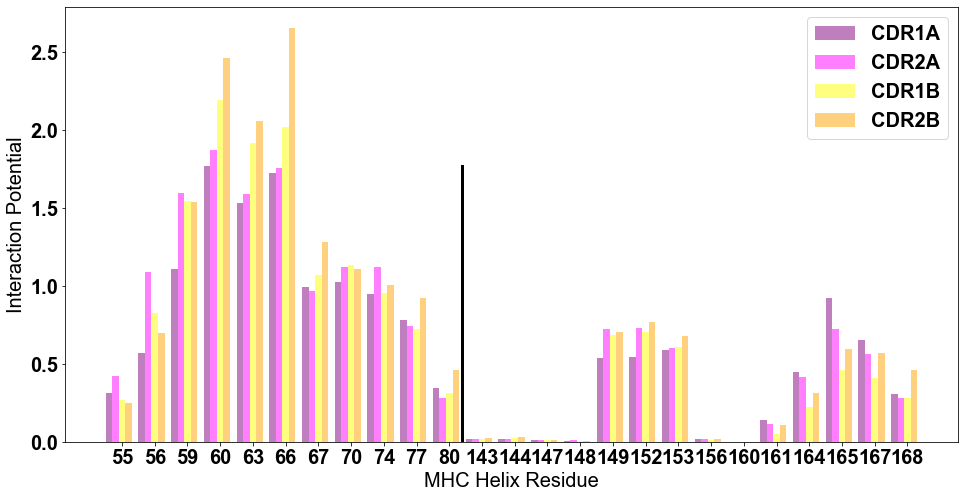

In [25]:
################################################################
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))

if mhc_class == 1:
    pl.bar(np.arange(len(cdra1_classI))-0.4,cdra1_classI,alpha=0.5,width=0.2,color='purple')
    pl.bar(np.arange(len(cdra2_classI))-0.2,cdra2_classI,alpha=0.5,width=0.2,color='magenta')
    pl.bar(np.arange(len(cdrb1_classI)),cdrb1_classI,alpha=0.5,width=0.2,color='yellow')
    pl.bar(np.arange(len(cdrb2_classI))+0.2,cdrb2_classI,alpha=0.5,width=0.2,color='orange')
    alpha_list = alpha1 + alpha2
    ax[0,0].legend(['CDR1A','CDR2A','CDR1B','CDR2B'])
    pl.plot(len(alpha1) * np.ones(100)-0.6, np.linspace(0,np.max(cdra1_classI),100),'black',linewidth = 3)
elif mhc_class == 2:
    pl.bar(np.arange(len(cdra1_classII))-0.4,cdra1_classII,alpha=0.5,width=0.2,color='purple')
    pl.bar(np.arange(len(cdra2_classII))-0.2,cdra2_classII,alpha=0.5,width=0.2,color='magenta')
    pl.bar(np.arange(len(cdrb1_classII)),cdrb1_classII,alpha=1.0,width=0.2,color='yellow')
    pl.bar(np.arange(len(cdrb2_classII))+0.2,cdrb2_classII,alpha=0.5,width=0.2,color='orange')
    alpha_list = II_alpha_contacts + II_beta_contacts
    ax[0,0].legend(['CDR1A','CDR2A','CDR1B','CDR2B'])
    pl.plot(len(II_alpha_contacts) * np.ones(100)-0.6, np.linspace(0,np.max(cdrb2_classII),100),'black',linewidth = 3)

pl.xlabel('MHC Helix Residue')
pl.ylabel('Interaction Potential')
label= alpha_list
xaxis = np.arange(len(alpha_list))
xax=pl.setp(ax[0,0],xticks=xaxis,xticklabels=label)

#pl.savefig('classI_byRes_v0.pdf',format='pdf')

# Ok so a final breakdown of all the shapes of the data structures we are dealing with...
- b1_scores is our highest level matrix, the raw data. shape is # mhc-trbv sequence pairs x # cdr1b msa positions x # mhc msa positions
- b1_breakdown is # TRBV x # HLA, with the average interaction score pulled out of the dataframe if you include each gene name
- b1_coords is a little odd. This is the dataframe of the residues that go into the scores of b1_breakdown. A little oddly formatted
- b1_noMatch are the entries which don't have these triad matches. Not useful as we could just go back to the b1_breakdown...
- cdrb1_classI is our byRes breakdown and just provides the averages

# Lastly,Do Good-Old Classic AIMS Biophysical Analysis
In the manuscript, we only do this for the MHC molecules, so do the same here

In [26]:
# Get the relevant subset of class I
subI = plot_seq_classI

# Need to get relevent subsets of class II
subIIa = plot_seq_classIIa
subIIb = plot_seq_classIIb
# Run these if you want these sequences as a dataframe
subI_df = pandas.DataFrame(subI); subI_df.index = classI[0]
subIIa_df = pandas.DataFrame(subIIa); subIIa_df.index = classIIa_df['Allele']
subIIb_df = pandas.DataFrame(subIIb); subIIb_df.index = classIIb_df['Allele']

In [ ]:
# Process this new matrix and apply biophysical propery "masks"
parallel_process = False
if mhc_class == 1:
    dsetF = subI_df[[0,1]].values
    num_iter = 1
elif mhc_class == 2:
    dsetF = subIIa_df
    num_iter = 2

# Need to get a little bit creative here to account for the fact that for Class II
# molecules, there is a data size mismatch... bit of a pain but we can get over it
for rep in np.arange(num_iter):
    if mhc_class == 1:
        dsetF = subI_df[[0,1]].values
    elif mhc_class == 2:
        if rep == 0:
            dsetF = subIIa_df[0].values.reshape(len(subIIa_df),1)
        elif rep == 1:
            dsetF = subIIb_df[0].values.reshape(len(subIIb_df),1)
    mat_size = aims.get_sequence_dimension(np.transpose(dsetF))[0]
    if rep == 0:
        mat_sizeF = mat_size
    if rep == 1:
        mat_sizeF = np.vstack((mat_sizeF,mat_size))
    seq_MIf = aims.gen_MSA_matrix(np.transpose(dsetF) ,key = AA_num_key_dash, giveSize = mat_size)

    #################### PARALLEL PROCESSING TO CREATE BIG MATRIX #######################
    if parallel_process:
        import multiprocessing as mp
        def boot_it(data):
            bigass = classy.get_bigass_matrix(dsetF[:,data[0]:data[1]], giveSize = mat_size, alignment = align, norm=True)
            return(bigass)
        def do_boot(data):
            with mp.Pool() as pool:
                results = pool.map(boot_it, data)
                return(results)
        if __name__ == "__main__":
            # Probably a smarter way to calculate #seqs per node, but do 100 for now
            final = aims.gen_splits(splitMat = seq_MIf, splitSize = 100)
            big_pre = do_boot(final)
        total_mat = np.concatenate(big_pre, axis = 0)
    else:
        bigass = classy.get_bigass_matrix(np.transpose(dsetF), giveSize = mat_size, alignment = 'center', norm = True )
        total_mat = bigass

    ### So in normal script, we have further processing for this BIG matrix... For this, lets just take out correlated data
    prop_list_old = ['Phobic1','Charge','Phobic2','Bulk','Flex','Kid1','Kid2','Kid3','Kid4','Kid5','Kid6','Kid7','Kid8','Kid9','Kid10']
    prop_list_new = ['Hot'+str(b+1) for b in range(46)]

    prop_names = prop_list_old + prop_list_new
    num_locs = int(np.shape(total_mat)[1]/61)
    Bigass_names = []
    for i in prop_names:
        for j in np.arange(num_locs):
            Bigass_names = Bigass_names + [ i + '-' + str(j) ]

    # AND THEN GO ON WITH THE REST OF THE dropping of correlated vectors
    full_big = pandas.DataFrame(total_mat,columns = Bigass_names)
    drop_zeros = [column for column in full_big.columns if all(full_big[column] == 0 )]
    y = full_big.drop(full_big[drop_zeros], axis=1)
    z_pre = np.abs(np.corrcoef(np.transpose(y)))
    z = pandas.DataFrame(z_pre,columns=y.columns,index=y.columns)
    # Select upper triangle of correlation matrix
    upper = z.where(np.triu(np.ones(z.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if ( any(upper[column] > 0.75) ) ]

    parsed_mat = y.drop(y[to_drop], axis=1)

    # Process things a little artifically just to match with previously written code
    ID_df = pandas.DataFrame(np.ones(len(full_big))); ID_df.columns = ['ID']
    dframe_IDed = pandas.concat([full_big,ID_df],axis=1)
    seq_bigF = aims.split_reshape(dframe_IDed, matShape = np.shape(seq_MIf)[1], total_props = 61)[0]
    if rep == 0:
        seq_bigF1 = seq_bigF
    elif rep == 1:
        seq_bigF2 = seq_bigF

In [ ]:
# Now get the position sensitive avarege biophysical properties
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,6))
prop1 = 2

if mhc_class == 1:
    plotProp = np.average(seq_bigF1[:,prop1,:],axis = 0)
    for i in np.arange(len(seq_bigF1[:,prop1,:])):
        ax[0,0].plot(seq_bigF1[i,prop1,:],linewidth=2.5,color='grey',alpha=0.1)
elif mhc_class == 2:
    plot_pre1 = np.average(seq_bigF1[:,prop1,:],axis = 0)
    plot_pre2 = np.average(seq_bigF2[:,prop1,:],axis = 0)
    plotProp = np.hstack((plot_pre1,plot_pre2))
    for i in np.arange(len(seq_bigF1[:,prop1,:])):
        ax[0,0].plot(seq_bigF1[i,prop1,:],linewidth=2.5,color='grey',alpha=0.1)
    for i in np.arange(len(seq_bigF2[:,prop1,:])):
        ax[0,0].plot(np.arange(len(plot_pre2))+len(plot_pre1),seq_bigF2[i,prop1,:],linewidth=2.5,color='grey',alpha=0.1)

ax[0,0].set_ylabel('Charge')
ax[0,0].plot(plotProp,marker='o',linewidth=2.5,color='red')
    

# Draw some nice lines to guide 
y11, y12 = ax[0,0].get_ylim()
if type(mat_sizeF) != int:
    for i in np.arange(len(mat_sizeF)-1):
        ax[0,0].plot( (mat_sizeF[i] + sum(mat_sizeF[:i]) - 1) * np.ones(100),np.linspace(y11,y12,100),'black',linewidth = 3)
get_xlim = ax[0,0].get_xlim()
pl.plot(np.arange(get_xlim[0],get_xlim[1]),np.zeros(len(np.arange(get_xlim[0],get_xlim[1]))),'black',linewidth = 3)

pl.ylabel('Normalized Hydropathy')
pl.xlabel('Sequence Position')
#pl.savefig('GLIPH_posProp.pdf',format='pdf')

# Now, Get Started on Reviewer Comments
If this paper ever comes out, maybe the general public will actually be able to see these reviews...

First, load in crystal structure data for comparisons to other data using AIMS. Load back in some of the *new* outputs from PRESTO (included in the app_data directory now)


In [28]:
# WE WONT USE ALL OF THESE YET, WE'LL USE MOST OF THEM FURTHER DOWN...
back_back = pandas.read_csv('app_data/revisions/back_back_class1.csv')
sc_sc = pandas.read_csv('app_data/revisions/side_side_class1.csv')
# REMEMBER SC_BACK is TCR sidechain, MHC backbone
sc_back = pandas.read_csv('app_data/revisions/side_back_class1.csv')
# BACK_SC is TCR backbone, MHC sidechain
back_sc = pandas.read_csv('app_data/revisions/back_side_class1.csv')

# Load in all the different interaction matrices
int_v0 = pandas.read_csv('app_data/AA_interactionV0.csv')
int_v1 = pandas.read_csv('app_data/AA_interactionV1.csv')
int_v2 = pandas.read_csv('app_data/AA_interactionV2.csv')

# Ok so important to note, while these matrices look quite nice, they are STRONGLY biased by AA Occurance probability
Specifically, I believe I read somewhere the A6:HLA-A2 structure has been solved 10 times.

If I'm looking at that structure repeatedly, it is obviously biasing the analysis. Need to normalize that out

# This code is for trying to count amino acids in sequences and attempt to normalize biases in crystallized structures

In [29]:
# Ok so every MHC in the seqFrameF file is the exact same length, and are already aligned
# And the residue numbers in the distance dataframe already match the alpha1 and alpha2 counts (thank god)

trav_seqs = pandas.read_csv('germline_data/trav_human_cdrs.csv')
trbv_seqs = pandas.read_csv('germline_data/trbv_human_cdrs.csv')

# Hardcoded this but this is the exact order as the residues in the interaction matrices
int_mat_res = ['A', 'G', 'L', 'M', 'F', 'W', 'K', 'Q', 'E', 'S', 'P', 'V', 'I',
       'C', 'Y', 'H', 'R', 'N', 'D', 'T']

# Use the sidechain dataset because it contains every PDB
classI_dset = sc_sc.loc[sc_sc['PDB'].drop_duplicates().index]
mhc_contacts = classI_dset['mhcNum'].drop_duplicates().values

mhc_seqs = []
tcr_seqs = []
cdr1a = []; cdr2a = []
cdr1b = []; cdr2b = []
for ind in classI_dset.index:
    mhc = classI_dset.loc[ind]['mhcID']
    tcra = classI_dset.loc[ind]['TRAV']
    tcrb = classI_dset.loc[ind]['TRBV']
    # Dont save any of these
    if mhc == 'HLA-E':
        continue
    if mhc == 'HLA-C':
        continue
    if mhc == 'MR1':
        continue

    dashLoc = mhc.find("-")
    finSeq = seqFrameF[seqFrameF[0]==mhc[dashLoc+1:]+':01:01']

    # So for now, just this is enough to capture ALL of our MHC
    # of interest.
    num = 1
    while len(finSeq) == 0:
        num = num+1
        finSeq = seqFrameF[seqFrameF[0]==mhc[dashLoc+1:]+':0'+str(num)+':01']
        if num > 10:
            print("CANT FIND MHC MATCH")
            break
    
    mhc_save = ''
    #for resi in mhc_contacts:
    for resi in alpha1+alpha2:
        # this contact only happens once, so must be an outlier
        if resi == 186:
            continue
        mhc_save = mhc_save + finSeq[1].values[0][resi]

    mhc_seqs = mhc_seqs + [mhc_save]
    cdr1a = cdr1a + [trav_seqs[trav_seqs['gene'] == tcra][['cdr1','cdr2']].values[0][0]]
    cdr2a = cdr2a + [trav_seqs[trav_seqs['gene'] == tcra][['cdr1','cdr2']].values[0][1]]
    cdr1b = cdr1b + [trbv_seqs[trbv_seqs['gene'] == tcrb][['cdr1','cdr2']].values[0][0]]
    cdr2b = cdr2b + [trbv_seqs[trbv_seqs['gene'] == tcrb][['cdr1','cdr2']].values[0][1]]

# Alright now lets fill out our matrix:
count_mat_tcr = np.zeros(len(int_mat_res))
count_mat_mhc = np.zeros(len(int_mat_res))

concat_tcr = np.vstack((cdr1a,cdr2a,cdr1b,cdr2b))

tcr_res_count = 0
mhc_res_count = 0

for j in np.arange(len(mhc_seqs)):
    for k in mhc_seqs[j]:
        for i in np.arange(len(int_mat_res)):
            if k == int_mat_res[i]:
                count_mat_mhc[i] += 1
        mhc_res_count += 1
    for z in ''.join(concat_tcr[:,j]):
        for i in np.arange(len(int_mat_res)):
            if z == int_mat_res[i]:
                count_mat_tcr[i] += 1
        tcr_res_count += 1

# Re-Visualize Every Crystal Structure as MHC Helices + CDR1+2 Alpha+Beta In an AIMS Matrix

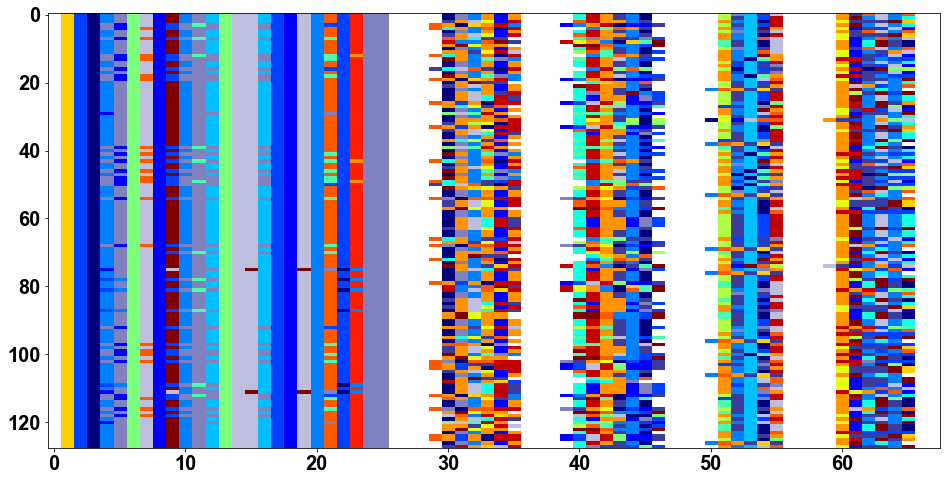

In [30]:
mhc_temp_df = pandas.DataFrame(mhc_seqs)
tcr_temp_df = np.transpose(pandas.DataFrame(concat_tcr))
mi_calc_temp = np.transpose(pandas.concat([mhc_temp_df,tcr_temp_df],axis=1))
mi_calc_temp.index = np.arange(5)

mat_size_mi = aims.get_sequence_dimension(np.array(mi_calc_temp))[0]
seq_MI_temp = aims.gen_MSA_matrix(np.array(mi_calc_temp) ,key = AA_num_key_dash, giveSize = mat_size_mi)

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
xyz = ax[0,0].imshow(seq_MI_temp, interpolation='nearest', aspect='auto',cmap=cmap)

#pl.savefig('cryst_human_aims.pdf',format='pdf')

# Visualize the Entropy of the Above AIMS Matrix

Text(0, 0.5, 'Entropy (Bits)')

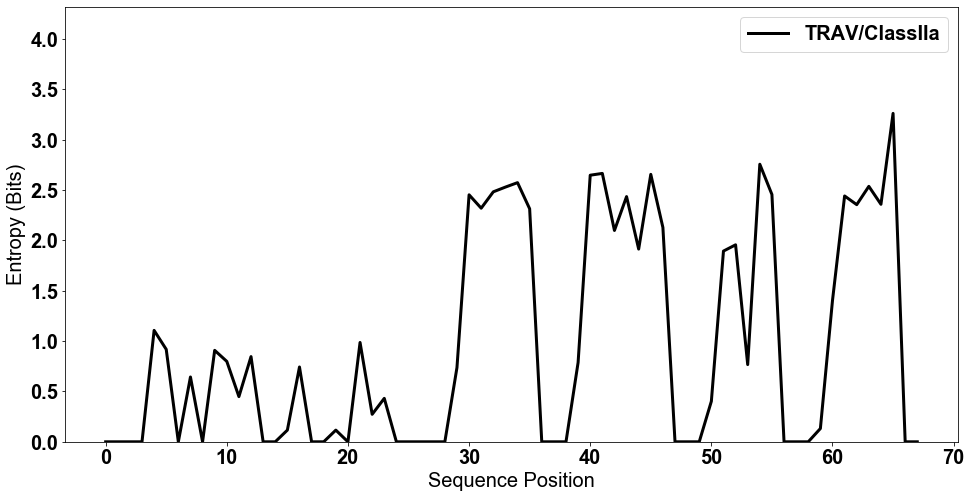

In [31]:
temp_ent, freq_temp = aims.calculate_shannon(seq_MI_temp)
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))

pl.plot(temp_ent,color='black',linewidth=3)

pl.legend(['TRAV/ClassIIa','TRBV/ClassIIb'])
pl.ylim([0,4.32])
pl.xlabel('Sequence Position')
pl.ylabel('Entropy (Bits)')

#pl.savefig('cryst_entropy_classI.pdf',format='pdf')

# Visualize the Mutual Information of this Crystallography Dataset

(0, 68)

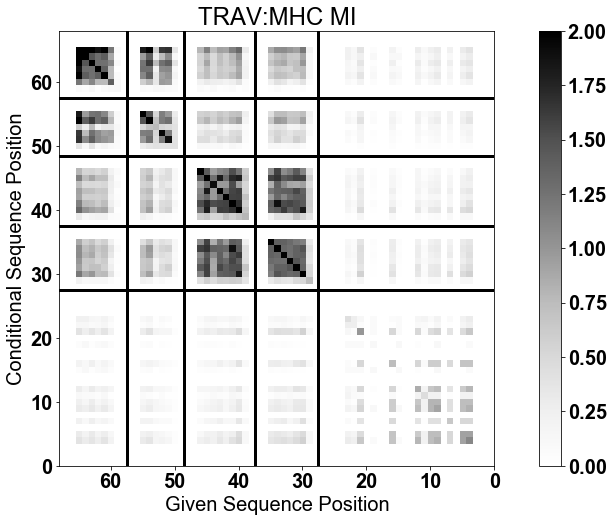

In [32]:
MI_temp,ent_cond_temp,counted_temp=aims.calculate_MI(seq_MI_temp)

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
x = ax[0,0].imshow(MI_temp,vmin=0,vmax=2,cmap=cm.Greys)
# Again, make something to guide the eyes
poses = sum(mat_size_mi)[0]
for i in np.arange(len(mat_size_mi)-1):
    ax[0,0].plot( (mat_size_mi[i] + sum(mat_size_mi[:i]) - 0.5) * np.ones(100),np.linspace(0,poses,100),'black',linewidth = 3)
    ax[0,0].plot( np.linspace(0,poses,100), (mat_size_mi[i] + sum(mat_size_mi[:i]) - 0.5) * np.ones(100) ,'black',linewidth = 3)
pl.colorbar(x)
pl.xlabel('Given Sequence Position')
pl.ylabel('Conditional Sequence Position')
pl.title('TRAV:MHC MI')
pl.xlim([68,0])
pl.ylim([0,68])

#pl.savefig('/Users/boughterct/Desktop/cryst_MI.pdf',format='pdf')

# Zoom in on just the cross-information (what we're interested in, not the symmetric or MHC-MHC/TCR-TCR Terms)

Text(0.5, 1.0, 'TRAV:MHC MI')

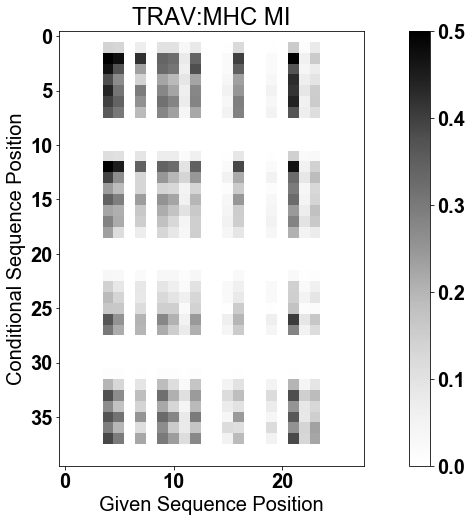

In [33]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(16,8))
x = ax[0,0].imshow(np.transpose(MI_temp[0:28,28:]),vmin=0,vmax=0.5,cmap=cm.Greys)
# Again, make something to guide the eyes
poses = sum(mat_size_mi)[0]
pl.colorbar(x)
pl.xlabel('Given Sequence Position')
pl.ylabel('Conditional Sequence Position')
pl.title('TRAV:MHC MI')
#pl.xlim([68,0])
#pl.ylim([0,68])


#pl.savefig('/Users/boughterct/Desktop/cryst_MI_zoom.pdf',format='pdf')

# This and the next code block are for looking for biases in crystallized datasets

In [34]:
# Need to run the same scripts to get out these same distributions for the actual genetic diversity
# MHC_CONTACTS IS DEFINED ABOVE
mhc_gene_seqs = []
for finSeq in seqFrameF[1].values:
    mhc_gene_save = ''
    for resi in mhc_contacts:
        # this contact only happens once, so must be an outlier
        if resi == 186:
            continue
        mhc_gene_save = mhc_gene_save + finSeq[resi]

    mhc_gene_seqs = mhc_gene_seqs + [mhc_gene_save]

# Int_mat_res is defined above as well...
concat_tcrGene = pandas.concat([trav_seqs[['cdr1','cdr2']],trbv_seqs[['cdr1','cdr2']]]).values
count_mat_tcrGene = np.zeros(len(int_mat_res))
count_mat_mhcGene = np.zeros(len(int_mat_res))
mhc_gene_res_count = 0
tcr_gene_res_count = 0
for j in np.arange(len(mhc_gene_seqs)):
    for k in mhc_gene_seqs[j]:
        for i in np.arange(len(int_mat_res)):
            if k == int_mat_res[i]:
                count_mat_mhcGene[i] += 1
        mhc_gene_res_count += 1

for j in np.arange(len(concat_tcrGene)):
    for z in ''.join(concat_tcrGene[j]):
        for i in np.arange(len(int_mat_res)):
            if z == int_mat_res[i]:
                count_mat_tcrGene[i] += 1
        tcr_gene_res_count += 1

# And this bar plot shows, for sure, that there are some serious differences between crystallized amino acid frequencies and those present across human genes

Text(0, 0.5, 'Residue Fraction')

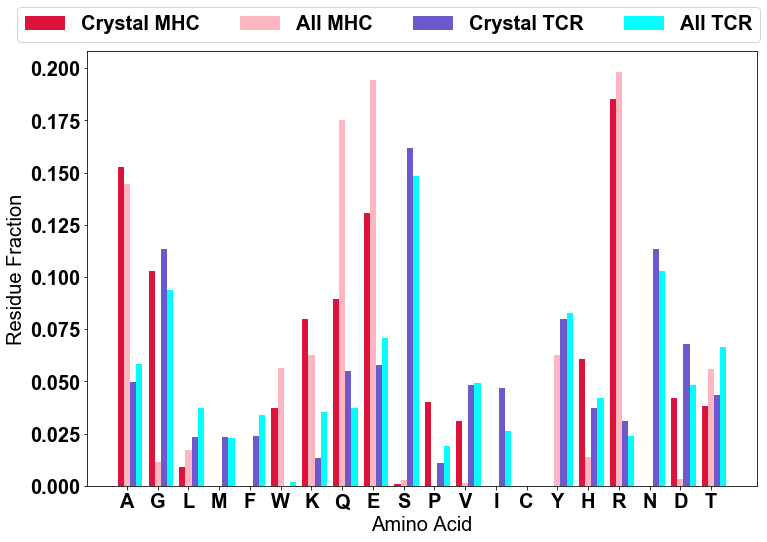

In [35]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(12,8))

pl.bar(np.arange(20),count_mat_mhc/mhc_res_count,width=0.2,color='crimson')
pl.bar(np.arange(20)+0.2,count_mat_mhcGene/mhc_gene_res_count,width=0.2,color='lightpink')
pl.bar(np.arange(20)+0.4,count_mat_tcr/tcr_res_count,width=0.2,color='slateblue')
pl.bar(np.arange(20)+0.6,count_mat_tcrGene/tcr_gene_res_count,width=0.2,color='aqua')

pl.legend(['Crystal MHC','All MHC','Crystal TCR','All TCR'],ncol=4,loc='upper center',bbox_to_anchor=(0.45, 0., 0, 1.125))

xax=pl.setp(ax,xticks=np.arange(20)+0.2,xticklabels=int_mat_res)
pl.xlabel('Amino Acid')
pl.ylabel('Residue Fraction')

#pl.savefig('/Users/boughterct/Desktop/classI_aaNorm.pdf',format='pdf')

# Alright Now Lets Try to Break Down Interactions By Their Potential

We need to order our genes (either TRAV or TRBV) into weak, mid, or strong interacting bins. Try to break them up roughly equally, where possible

In [58]:
# SO THE NUMBERS HERE RIGHT NOW ARE WHAT WE HAVE FOR "new_sup6" and "figure5_new". DO NOT CHANGE
# Also note that these are the "improper" interaction potentials to both alpha helices

weak_trav = trav_plot_df.sort_values()[0:20]
mid_trav = trav_plot_df.sort_values()[20:35]
strong_trav = trav_plot_df.sort_values()[35:]

weak_trbv = trbv_plot_df.sort_values()[0:19]
mid_trbv = trbv_plot_df.sort_values()[19:33]
strong_trbv = trbv_plot_df.sort_values()[33:]

In [59]:
# Need to bin based on weak_trav, mid_trav, strong_trav
# and weak_trbv, mid_trbv, strong_trbv
count_weakA = []; count_weakB =[]
count_midA = []; count_midB = []
count_strongA = []; count_strongB = []
for segs in ['sc_sc','sc_back','back_sc','back_back']:
    if segs == 'sc_sc':
        dset = sc_sc
    elif segs == 'sc_back':
        dset = sc_back
    elif segs == 'back_sc':
        dset = back_sc
    elif segs == 'back_back':
        dset = back_back
    gotA = False; gotB = False
    for pdb in dset['PDB'].drop_duplicates().values:
        sub_dset = dset[dset['PDB']==pdb]
        mhcID = sub_dset['mhcID'].values
        tcrA = sub_dset['TRAV'].values[0]
        tcrB = sub_dset['TRBV'].values[0]
        # Need to see if the TRAV/TRBV is weak, mid, strong
        if len(weak_trav.index[weak_trav.index == tcrA]) == 1:
            count_weakA = count_weakA + [['weakA',pdb,len(sub_dset),segs]]
            gotA = True
        if len(mid_trav.index[mid_trav.index == tcrA]) == 1:
            count_midA = count_midA + [['midA',pdb,len(sub_dset),segs]]
            gotA = True
        if len(strong_trav.index[strong_trav.index == tcrA]) == 1:
            count_strongA = count_strongA + [['strongA',pdb,len(sub_dset),segs]]
            gotA = True
        if len(weak_trbv.index[weak_trbv.index == tcrB]) == 1:
            count_weakB = count_weakB + [['weakB',pdb,len(sub_dset),segs]]
            gotB = True
        if len(mid_trbv.index[mid_trbv.index == tcrB]) == 1:
            count_midB = count_midB + [['midB',pdb,len(sub_dset),segs]]
            gotB = True
        if len(strong_trbv.index[strong_trbv.index == tcrB]) == 1:
            count_strongB = count_strongB + [['strongB',pdb,len(sub_dset),segs]]
            gotB = True
        
        if gotA == False:
            print(tcrA)
        if gotB == False:
            print(tcrB)

count_all = count_weakA + count_midA + count_strongA + count_weakB + count_midB + count_strongB
crystVint_df = pandas.DataFrame(count_all,columns=['Cat','PDB','Count','Type'])

In [60]:
gene_strengths = pandas.concat([weak_trav,mid_trav,strong_trav,weak_trbv,mid_trbv,strong_trbv])
strength_id = pandas.DataFrame(['weakA']*len(weak_trav)+['midA']*len(mid_trav)+['strongA']*len(strong_trav)+['weakB']*len(weak_trbv)+['midB']*len(mid_trbv)+['strongB']*len(strong_trbv),index=gene_strengths.index)
final_strong = pandas.concat([gene_strengths,strength_id],axis=1)
final_strong.columns = ['strength','id']

In [62]:
input_df = pandas.read_csv('app_data/revisions/tcr3d_classImeta.csv')
human_df = input_df[input_df['Species']=='Human']

possibles = ['sc_sc','sc_back','back_sc','back_back']
for pdb in human_df['PDB<BR>ID'].drop_duplicates().values:
    sub_dset = crystVint_df[crystVint_df['PDB']==pdb]
    if len(sub_dset)==0:
        # there just aren't any contacts in some of these PDBS,
        # largely due to processing issues
        continue

    tcr_hold = human_df[human_df['PDB<BR>ID'] == pdb]
    Atcr = tcr_hold['TRAV<BR>gene'].values[0]
    Btcr = tcr_hold['TRBV<BR>gene'].values[0]

    aid = final_strong.loc[Atcr]['id']
    bid = final_strong.loc[Btcr]['id']
    # Basically if we don't have a complete set of contacts,
    # need a way to add back in "0" counts
    if len(sub_dset) != 8:
        for set in possibles:
            oneset = sub_dset[sub_dset['Type'] == set]
            if len(oneset[oneset['Cat'] == aid]) == 0:
                temp = pandas.DataFrame([[aid,pdb,0,set]],columns = crystVint_df.columns)
                crystVint_df = pandas.concat([crystVint_df,temp],axis=0)
            if len(oneset[oneset['Cat'] == bid]) == 0:
                temp = pandas.DataFrame([[bid,pdb,0,set]],columns = crystVint_df.columns)
                crystVint_df = pandas.concat([crystVint_df,temp],axis=0)


# Now We're Effectively Re-Doing The PRESTO Comparisons Between Interaction Scores and Crystal Contacts
This is just a bit of a more cautious way of doing things, even if "weak", "medium", and "strong" is not particularly precise

Text(0.5, 0, '')

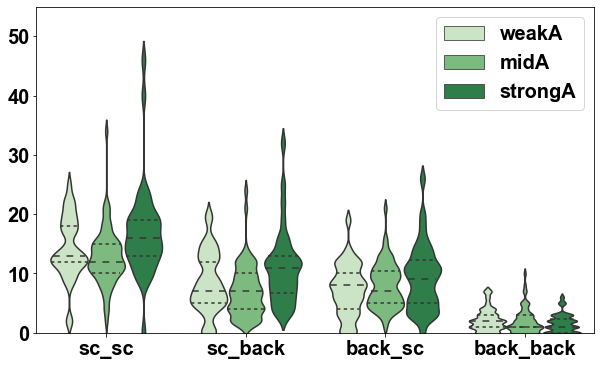

In [63]:
plotA = pandas.concat([crystVint_df[crystVint_df['Cat'] == 'weakA'],crystVint_df[crystVint_df['Cat'] == 'midA'],crystVint_df[crystVint_df['Cat'] == 'strongA']])
plotB = pandas.concat([crystVint_df[crystVint_df['Cat'] == 'weakB'],crystVint_df[crystVint_df['Cat'] == 'midB'],crystVint_df[crystVint_df['Cat'] == 'strongB']])

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(10,6))
x=sns.violinplot(x='Type',y='Count',data=plotA,inner="quartile",palette='Greens',hue='Cat',scale='width',bw=0.2)
#x=sns.violinplot(x='Type',y='Count',data=plotB,inner="quartile",palette='Reds',hue='Cat',scale='width',bw=0.2)
#x=sns.swarmplot(x='Type',y='Count',data=plotB,palette='Reds',hue='Cat')
x.legend_.set_title(None)
pl.ylim([0,55])
pl.ylabel(''); pl.xlabel('')

#pl.savefig('tcrB_crys_stats.pdf',format='pdf')

# So for doing these statistics, we have some nice symmetries
If we look at these contact counts for EITHER the "proper" CDR-MHC interactions or the "unbiased" interactions, the statistically significant differences between the number of contacts does not change (in other words, not stat. sig. for TCRBeta, only stat. sig. for SC_SC and SC_back for TCRalpha.)

In [66]:
# Alright so I've already been using the permutation test, keep at it to generate statistics for these
# non-normally distributed data types. Try to get it going below:

# These are the parameters that you can change here
###############################################################
test = 'median'
# Pick these based off of the above plot
B_sc = plotA[plotA['Type'] == 'sc_sc']
###############################################################

B_scWeak = B_sc[B_sc['Cat']=='weakA']
B_scMid = B_sc[B_sc['Cat']=='midA']
B_scStrong = B_sc[B_sc['Cat']=='strongA']

Bsc_weakLen = len(B_scWeak)
Bsc_midLen = len(B_scMid)
Bsc_strongLen = len(B_scStrong)

if test.lower() == 'average':
    z0_StrongWeak = np.average(B_scStrong['Count'].values) - np.average(B_scWeak['Count'].values)
    z0_StrongMid = np.average(B_scStrong['Count'].values) - np.average(B_scMid['Count'].values)
    z0_MidWeak = np.average(B_scMid['Count'].values) - np.average(B_scWeak['Count'].values)
elif test.lower() == 'median':
    z0_StrongWeak = np.median(B_scStrong['Count'].values) - np.median(B_scWeak['Count'].values)
    z0_StrongMid = np.median(B_scStrong['Count'].values) - np.median(B_scMid['Count'].values)
    z0_MidWeak = np.median(B_scMid['Count'].values) - np.median(B_scWeak['Count'].values)

num_reps = 100000
a = 0; b = 0; c = 0
for rep in np.arange(num_reps):
    np.random.shuffle(B_sc['Count'].values)
    reWeak = B_sc['Count'].values[0:Bsc_weakLen]
    reMid = B_sc['Count'].values[Bsc_weakLen:Bsc_midLen+Bsc_weakLen]
    reStrong = B_sc['Count'].values[Bsc_weakLen+Bsc_midLen:]
    
    if test.lower() == 'average':
        z_StrongWeak = np.average(reStrong) - np.average(reWeak)
        z_StrongMid = np.average(reStrong) - np.average(reMid)
        z_MidWeak = np.average(reMid) - np.average(reWeak)
    elif test.lower() == 'median':
        z_StrongWeak = np.median(reStrong) - np.median(reWeak)
        z_StrongMid = np.median(reStrong) - np.median(reMid)
        z_MidWeak = np.median(reMid) - np.median(reWeak)


    if z_StrongWeak**2 >= z0_StrongWeak**2:
        a = a + 1
    if z_StrongMid**2 >= z0_StrongMid**2:
        b = b + 1
    if z_MidWeak**2 >= z0_MidWeak**2:
        c = c + 1

p_StrongWeak = (a+1)/(num_reps+1)
p_StrongMid = (b+1)/(num_reps+1)
p_MidWeak = (c+1)/(num_reps+1)


print(p_StrongWeak,p_StrongMid,p_MidWeak)

0.042089579104208956 0.0014499855001449985 0.7327626723732763


In [67]:
# I do need to do some kind of statistical testing on this "plotA/B" data

scsc=plotA[plotA['Type'] == 'sc_sc']
wscsc = scsc[scsc['Cat']=='weakA']
mscsc = scsc[scsc['Cat']=='midA']
sscsc = scsc[scsc['Cat']=='strongA']

# So the wikipedia page on False Discovery Rate suggests that FDR can be used as a replacement for multiple test corrections
# (like, say, Bonferroni). This is good, because the AIMS paper also asked for Bonferroni-corrected data.
# METHOD:
# Plot p-values in ascending order (small to large, "step-up procedure").
# Use the Benjamini-Hochberg Proecdure - define an alpha = 0.01 = 1% (can alter this though)
# Find the largest integer "k" such that P(k) <= k/m*alpha, where m = total number of tests and P(k) is the kth ascending p-value
# Reject the null-hypothesis for all discoveries up to k.
# This procedure works when the m-tests are independent. 
# You can then refer to an "FDR cutoff" of alpha, since your FDR will be less than or equal to this alpha. Doesn't seem rigorous, but ok.
# There are other methods to control for dependence but this shouldn't be an issue in my data, I don't believe.

# Evidently the q-value is a little different. Whereas the p-value gives expected false positive rate,
# q-value is meant to improve FDR, because FDR is not defined when there are no positive results (i.e. no rejections of null hypothesis)
# Evidently it is equivalent to the FDR in many cases? A bit unclear. Maybe should go deeper thank wikipedia...




# So this below script is for trying to count interactions empirically

In [71]:
# Alright so we're going to create a function to tally up probabilities of contacts
# between germline amino acids and MHC helices, with care taken to count backbone vs. sidechain interactions

dset = pandas.concat([back_sc,sc_back])
#dset = sc_back
# DO YOU WANT TO SYMMETRIZE THE DATA? OR NO?
symm = True

# Hardcoded this but this is the exact order as the residues in the interaction matrices
int_mat_res = ['A', 'G', 'L', 'M', 'F', 'W', 'K', 'Q', 'E', 'S', 'P', 'V', 'I',
       'C', 'Y', 'H', 'R', 'N', 'D', 'T']

count_mat = np.zeros([len(int_mat_res),len(int_mat_res)])
tot_res = 0

tcr_res = dset['tcrRes'].values
mhc_res = dset['mhcRes'].values
mhcID = dset['mhcID'].values

for i in np.arange(len(tcr_res)):

    # Lets skip MR1, HLA-C, and HLA-E for now
    # Data on them is limited...
    if mhcID[i] == 'MR1':
        continue
    if mhcID[i] == 'HLA-E':
        continue
    if mhcID[i] == 'HLA-C':
        continue

    tcr = aims.convert_3Let([tcr_res[i]])
    mhc = aims.convert_3Let([mhc_res[i]])

    for j in np.arange(len(int_mat_res)):
        if tcr == int_mat_res[j]:
            a = j
        if mhc == int_mat_res[j]:
            b = j
    count_mat[a,b] += 1
    tot_res += 1
    if symm:
        count_mat[b,a] += 1

norm_mhc = count_mat_mhc/mhc_res_count
norm_tcr = count_mat_tcr/tcr_res_count

# Empirical MHC-TCR Contact Data

Text(0, 0.5, 'TCR Residue')

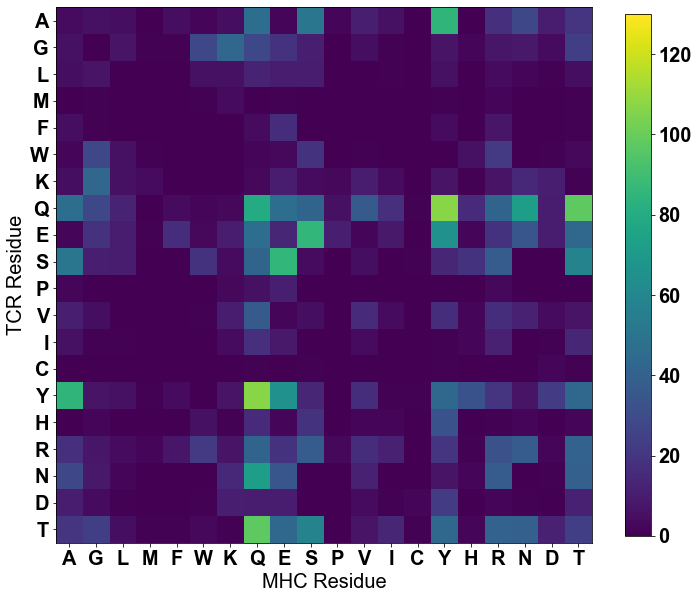

In [72]:
norm_count_mat = np.zeros([len(int_mat_res),len(int_mat_res)])
for i in np.arange(len(norm_tcr)):
    for j in np.arange(len(norm_mhc)):
        norm_count_mat[i,j] = norm_tcr[i]*norm_mhc[j]

fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(12,12))
x = pl.imshow(count_mat,vmin=0,vmax = 130)
xax=pl.setp(ax,xticks=np.arange(20),xticklabels=int_mat_res)
xax=pl.setp(ax,yticks=np.arange(20),yticklabels=int_mat_res)
pl.colorbar(x,shrink=0.8)
pl.xlabel('MHC Residue')
pl.ylabel('TCR Residue')
#pl.savefig('sc_b_b_sc_scale.pdf',format='pdf')

# Whereas this is a count of the *bias* in the crystallography data compared to expected contacts in TCR and MHC data 

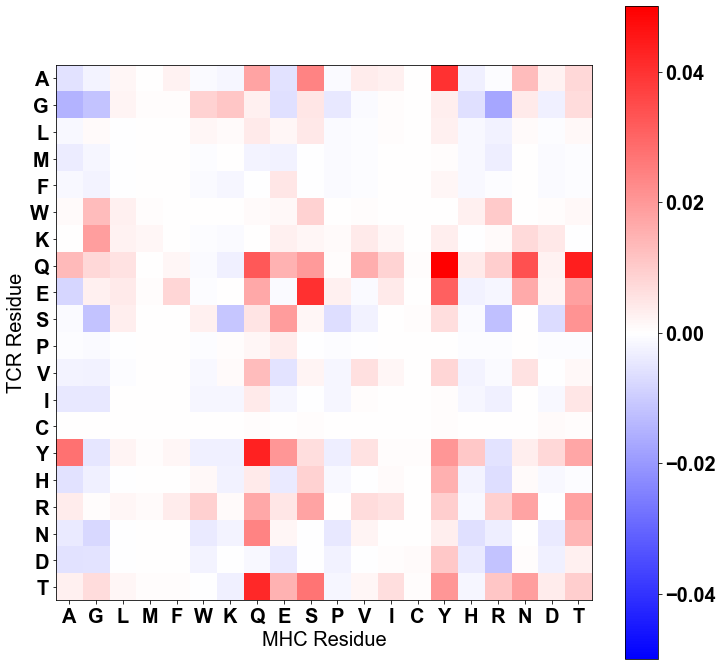

In [73]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(12,12))
x = pl.imshow(count_mat/(tot_res)-norm_count_mat,vmin=-0.05,vmax=0.05,cmap='bwr')
#x = pl.imshow(count_mat)
xax=pl.setp(ax,xticks=np.arange(20),xticklabels=int_mat_res)
xax=pl.setp(ax,yticks=np.arange(20),yticklabels=int_mat_res)
pl.xlabel('MHC Residue')
pl.ylabel('TCR Residue')
pl.colorbar(x)
#pl.title('Backbone-Backbone Interactions')
#pl.savefig('sc_properNorm.pdf',format='pdf')

# And then, for comparison, we can visualize the interaction potentials for comparison to these empirical datasets
Obviously, the symmetrized form of the empirical matrices looks more like the interaction matrix, since the non-symmetrized version of the empirical data is biased by the residue frequencies in TCRs or MHC

Text(0.5, 1.0, 'V2 Interaction Potential')

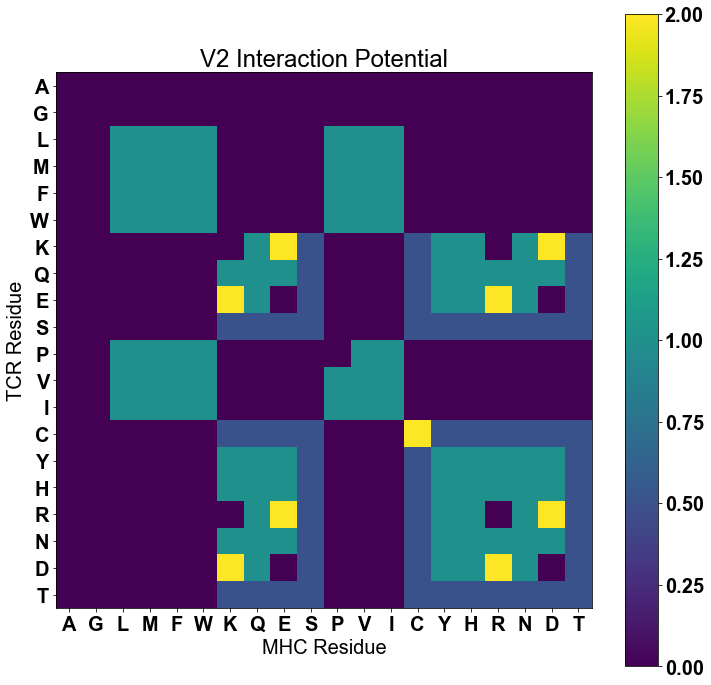

In [74]:
fig, ax = pl.subplots(1, 1,squeeze=False,figsize=(12,12))
y = pl.imshow(int_v2.drop('Residue',axis=1),vmin=0)
pl.colorbar(y)
xax=pl.setp(ax,xticks=np.arange(20),xticklabels=int_mat_res)
xax=pl.setp(ax,yticks=np.arange(20),yticklabels=int_mat_res)
pl.xlabel('MHC Residue')
pl.ylabel('TCR Residue')
pl.title('V2 Interaction Potential')
#pl.savefig('interaction_potentialV2_color.pdf',format='pdf')

# NOTES FROM NEWEST REVISIONS

I didn't actually incorporate the CHARMM Force Field into the interaction scores yet, but it is a potential future direction.

# Using CHARMM to Make Our Interactions More Precise
 Alright so reviewer 1 says 4.5 Angstrom is the cutoff we use for hydrophobic interactions,
 while reviewer 2 says we should use 6 Angstrom for charged interactions.

 Reviewer 1 also says that we *can* get O-O and N-N donor-acceptor pairs
 I dont know if I agree with that... lets look at the CHARMM topology files to look at charge distribution

 Note, all of the CHARMM structures have hydrogen, so should sum across these hydrogens to get the net charge

 Other useful link that is NOT CHARMM https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/charge/
 This link is actually GREAT, because it explicitly has a table 

- Ala +0 // 0.09 + 0.09 + 0.09 - 0.27 = 0 Net charge [V. weak donor]
- Arg +1 // NH1 +1 [Charge] // NH2 -0.8 + 0.46 + 0.46 = .12 [Donor] // NE (pre split) -0.7 + 0.44 = -0.26 [donor, got an H]
- Asn +0 // ND2 -0.62 (neutralized by 2 x H) [Donor] // OD1 -0.55 (neutralized by carbon) [Acceptor]
- Asp -1 // OD2 -0.76 // OD1 -0.76. So BOTH are acceptors. CHARMM treats them equally
- Cys +0 // SG -0.23 + 0.16 = -0.07 [weak acceptor]
- Gln +0 // NE2 -0.62 + 0.32 + 0.3 [Donor] // OE1 [Acceptor]
- Glu -1 // OE1 -0.75 // OE2 -0.76. BOTH acceptors. CHARMM treats equally (again)
- Gly +0 //  -0.02 + 0.09 = 0.07 [V. weak donor]
- Hsd/Hse/Hsp +0 // NE2 -0.7 [acceptor] // ND1 -0.36 + 0.32 = -0.04 [donor] BUT, COULD BE REVERSED, or both donors, depending on pH
- Ile // None
- Leu // None
- Lys +1 // NZ -0.3 + 0.33 + 0.33 + 0.33 = 0.69 [donor]
- Met +0 // SD - 0.09 [weak acceptor]
- Phe // None
- Pro // None
- Ser +0 // OG -0.66 + 0.43 [donor OR acceptor, hydrogen there stochastically]
- Thr +0 // OG -0.66 + 0.43 [donor OR acceptor, hydrogen there stochastically]
- Trp +0 // NE1 -0.51 + 0.37 = -0.14 [donor]
- Tyr +0 // OH -0.54 + 0.43 [donor OR acceptor, hydrogen there stochastically]
- Val // None

So the comment back to reviewer is that really only Ser/Thr/Tyrosine O is a donor and Histidine N are acceptors